## Data Prediction

In [445]:
#import pandas as pdValueError: could not convert string to float: '2017-09-30 18:30:00'
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [446]:
df_weather_actual=pd.read_csv('Data/weather_actuals_prepared2.csv')

In [447]:
df_weather_actual.shape

(13619, 25)

In [448]:
df_weather_actual.dtypes

Unnamed: 0                int64
plant_id                  int64
datetime_utc             object
datetime_local           object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing            float64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                float64
ozone                   float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at               object
power                   float64
dtype: object

In [449]:
df_weather_actual.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            13619 non-null  int64  
 1   plant_id              13619 non-null  int64  
 2   datetime_utc          13619 non-null  object 
 3   datetime_local        13619 non-null  object 
 4   cloud_cover           13619 non-null  float64
 5   apparent_temperature  13619 non-null  float64
 6   temperature           13619 non-null  int64  
 7   humidity              13619 non-null  int64  
 8   dew_point             13619 non-null  float64
 9   wind_bearing          13619 non-null  float64
 10  wind_speed            13619 non-null  float64
 11  wind_gust             13619 non-null  float64
 12  pressure              13619 non-null  float64
 13  uv_index              13619 non-null  float64
 14  ozone                 13619 non-null  float64
 15  precip_intensity   

In [450]:
df_weather_actual['precip_probability'].nunique()

65

In [451]:
df_weather_actual.loc[0:25]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,power
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,...,0.0,0.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0000
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0000
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0000
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,...,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0000
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0000
5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0000
6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,177.0,...,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0200
7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,1.1925
8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,177.0,...,0.0,0.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,5.1375
9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237.0,...,0.0,0.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,8.2250


In [452]:
print(df_weather_actual['icon'].value_counts())
print(df_weather_actual['summary'].value_counts())
print(df_weather_actual['humidity'].value_counts())

icon
clear-night            3075
clear-day              2997
fog                    2920
partly-cloudy-day      1768
partly-cloudy-night    1458
cloudy                 1305
rain                     94
wind                      2
Name: count, dtype: int64
summary
Clear                            5567
Foggy                            2918
Partly Cloudy                    1179
Humid and Mostly Cloudy           826
Humid and Overcast                714
Mostly Cloudy                     638
Overcast                          591
Humid and Partly Cloudy           583
Humid                             505
Possible Light Rain and Humid      52
Possible Light Rain                20
Rain and Humid                     13
Light Rain and Humid                4
Humid and Foggy                     2
Rain                                2
Breezy and Foggy                    2
Light Rain                          1
Possible Drizzle and Humid          1
Possible Drizzle                    1
Name: count, dt

we are going to select only `icon` and `humidity` as categorical features, `summary` having larger categories with imbalance data would not able to perform while training model

In [454]:
df_weather_actual.columns

Index(['Unnamed: 0', 'plant_id', 'datetime_utc', 'datetime_local',
       'cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at', 'power'],
      dtype='object')

In [455]:
df_weather_actual['summary'].unique()

array(['Clear', 'Foggy', 'Partly Cloudy', 'Mostly Cloudy',
       'Breezy and Foggy', 'Overcast', 'Humid and Partly Cloudy',
       'Humid and Mostly Cloudy', 'Humid and Overcast', 'Humid and Foggy',
       'Possible Light Rain and Humid', 'Humid', 'Possible Light Rain',
       'Rain', 'Light Rain', 'Light Rain and Humid',
       'Possible Drizzle and Humid', 'Rain and Humid', 'Possible Drizzle'],
      dtype=object)

In [456]:
df_weather_actual2=df_weather_actual.copy()

In [457]:
df_weather_actual2.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,power
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,...,0.0,0.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,...,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,...,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0


In [458]:
df_weather_actual2['datetime_local'] = pd.to_datetime(df_weather_actual2['datetime_local'])
df_weather_actual2['datet'] = df_weather_actual2['datetime_local'].dt.date
df_weather_actual2['datet'] = df_weather_actual2['datetime_local'].dt.date
df_weather_actual2['Month'] = df_weather_actual2['datetime_local'].dt.month
df_weather_actual2['Hour1'] = df_weather_actual2['datetime_local'].dt.hour

In [459]:
df_weather_actual2

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,visibility,sunrise,sunset,icon,summary,updated_at,power,datet,Month,Hour1
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308.0,...,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0,2017-10-01,10,0
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.00,28.78,27,1,20.06,177.0,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,2017-10-01,10,1
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.00,26.58,26,1,19.97,177.0,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,2017-10-01,10,2
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270.0,...,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0,2017-10-01,10,3
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.00,24.13,24,1,17.84,177.0,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,2017-10-01,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,13614,1,2019-09-30 13:30:00,2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40.0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46,0.0,2019-09-30,9,19
13615,13615,1,2019-09-30 14:30:00,2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59.0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46,0.0,2019-09-30,9,20
13616,13616,1,2019-09-30 15:30:00,2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76.0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46,0.0,2019-09-30,9,21
13617,13617,1,2019-09-30 16:30:00,2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88.0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46,0.0,2019-09-30,9,22


In [460]:
df_weather_actual2.columns

Index(['Unnamed: 0', 'plant_id', 'datetime_utc', 'datetime_local',
       'cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at', 'power', 'datet', 'Month', 'Hour1'],
      dtype='object')

In [461]:
df_weather_actual2['precip_probability'].nunique()

65

In [462]:
df_weather_actual2.drop(['Unnamed: 0','plant_id', 'precip_type','summary'],axis=1,inplace=True)

In [463]:
df_weather_actual2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime_utc          13619 non-null  object        
 1   datetime_local        13619 non-null  datetime64[ns]
 2   cloud_cover           13619 non-null  float64       
 3   apparent_temperature  13619 non-null  float64       
 4   temperature           13619 non-null  int64         
 5   humidity              13619 non-null  int64         
 6   dew_point             13619 non-null  float64       
 7   wind_bearing          13619 non-null  float64       
 8   wind_speed            13619 non-null  float64       
 9   wind_gust             13619 non-null  float64       
 10  pressure              13619 non-null  float64       
 11  uv_index              13619 non-null  float64       
 12  ozone                 13619 non-null  float64       
 13  precip_intensity

In [464]:
# Drop the 'datetime_local' column from the DataFrame
df_weather_actual3 = df_weather_actual2.drop('datetime_local', axis=1)


In [465]:
df_weather_actual3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime_utc          13619 non-null  object 
 1   cloud_cover           13619 non-null  float64
 2   apparent_temperature  13619 non-null  float64
 3   temperature           13619 non-null  int64  
 4   humidity              13619 non-null  int64  
 5   dew_point             13619 non-null  float64
 6   wind_bearing          13619 non-null  float64
 7   wind_speed            13619 non-null  float64
 8   wind_gust             13619 non-null  float64
 9   pressure              13619 non-null  float64
 10  uv_index              13619 non-null  float64
 11  ozone                 13619 non-null  float64
 12  precip_intensity      13619 non-null  float64
 13  precip_probability    13619 non-null  float64
 14  visibility            13619 non-null  float64
 15  sunrise            

In [466]:
df_weather_actual3.loc[2]
df_weather_actual3['cloud_cover'].unique()

array([0.  , 0.09, 0.14, 0.15, 0.01, 0.31, 0.25, 0.35, 0.2 , 0.24, 0.1 ,
       0.23, 0.16, 0.19, 0.58, 0.26, 0.33, 0.22, 0.27, 0.03, 0.55, 0.18,
       0.08, 0.32, 0.29, 0.28, 0.51, 0.63, 0.54, 0.07, 0.64, 0.68, 0.67,
       0.06, 0.91, 0.79, 0.53, 0.38, 0.12, 0.21, 0.47, 0.13, 0.04, 0.05,
       0.17, 0.62, 0.6 , 0.65, 0.45, 0.48, 0.72, 0.76, 0.42, 0.43, 0.36,
       0.85, 0.92, 0.87, 0.96, 1.  , 0.69, 0.78, 0.75, 0.52, 0.37, 0.34,
       0.4 , 0.49, 0.39, 0.59, 0.11, 0.46, 0.56, 0.77, 0.83, 0.7 , 0.41,
       0.84, 0.61, 0.44, 0.74, 0.02, 0.3 , 0.57, 0.81, 0.98, 0.99, 0.88,
       0.93, 0.89, 0.5 , 0.66, 0.97, 0.94, 0.95, 0.8 , 0.73, 0.71, 0.86,
       0.9 , 0.82])

In [467]:
# Define the aggregation functions for numeric and non-numeric columns
agg_funcs = {
    col: 'mean' if df_weather_actual3[col].dtype in ['int64', 'float64'] else (lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    for col in df_weather_actual3.columns if col not in ['Month', 'Hour1']
}

# Group by 'Month' and 'Hour1' with as_index=False
grouped_df = df_weather_actual3.groupby(['Month', 'Hour1'], as_index=False).agg(agg_funcs)


In [468]:
import pickle

# Save as pickle
with open('grouped_df.pkl', 'wb') as f:
    pickle.dump(grouped_df, f)

# To load the DataFrame
#with open('grouped_df.pkl', 'rb') as f:
    #grouped_df_loaded = pickle.load(f)


In [469]:
grouped_df.iloc[0]

Month                                     1
Hour1                                     0
datetime_utc            2017-12-31 18:30:00
cloud_cover                        0.147097
apparent_temperature              11.072419
temperature                        11.16129
humidity                           0.725806
dew_point                          4.764516
wind_bearing                     190.435484
wind_speed                         1.364194
wind_gust                          3.739355
pressure                        1017.785484
uv_index                                0.0
ozone                            269.522581
precip_intensity                   0.023226
precip_probability                 0.008387
visibility                         8.570484
sunrise                 2018-01-01 01:52:27
sunset                  2018-01-01 12:12:18
icon                                    fog
updated_at              2019-07-16 16:37:16
power                                   0.0
datet                           

In [470]:
# Separate categorical and numeric features
categorical_features = grouped_df.select_dtypes(include=['object', 'category']).columns
numeric_features = grouped_df.select_dtypes(include=[np.number]).columns

# Perform Chi-square test for categorical features against the target variable
chi2_results = {}
for col in categorical_features:
    contingency_table = pd.crosstab(grouped_df[col], grouped_df['power'])
    chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2 Stat': chi2_stat, 'p-value': p_value}

# Display Chi-square test results
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p-value')
print("Chi-square Test Results for Categorical Data:\n", chi2_df)


Chi-square Test Results for Categorical Data:
                  Chi2 Stat   p-value
datetime_utc  40608.000000  0.309456
updated_at      861.061224  0.351904
sunrise        1693.251891  0.486847
sunset         1693.251891  0.486847
datet          1693.251891  0.486847
icon            654.038146  0.915196


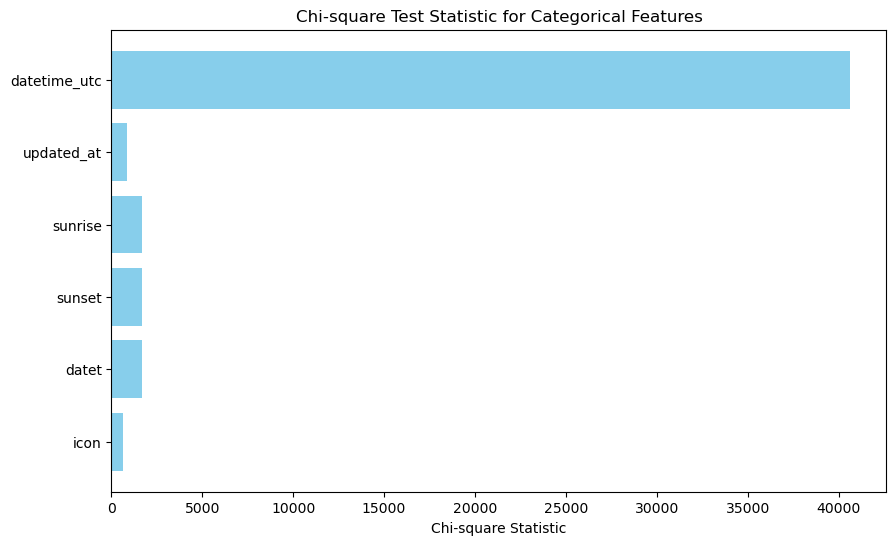

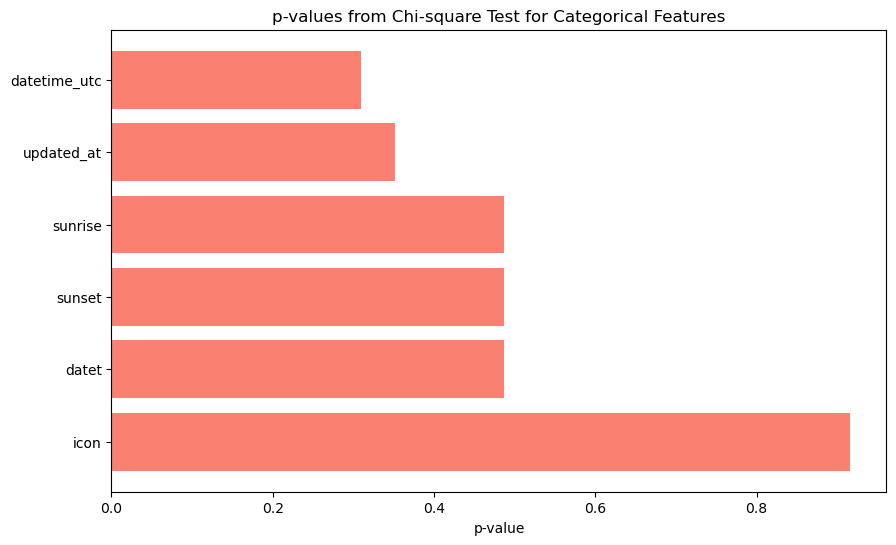

In [471]:
# Plot Chi-square statistic
plt.figure(figsize=(10, 6))
plt.barh(chi2_df.index, chi2_df['Chi2 Stat'], color='skyblue')
plt.xlabel('Chi-square Statistic')
plt.title('Chi-square Test Statistic for Categorical Features')
plt.gca().invert_yaxis()
plt.show()

# Plot p-values
plt.figure(figsize=(10, 6))
plt.barh(chi2_df.index, chi2_df['p-value'], color='salmon')
plt.xlabel('p-value')
plt.title('p-values from Chi-square Test for Categorical Features')
plt.gca().invert_yaxis()
plt.show()

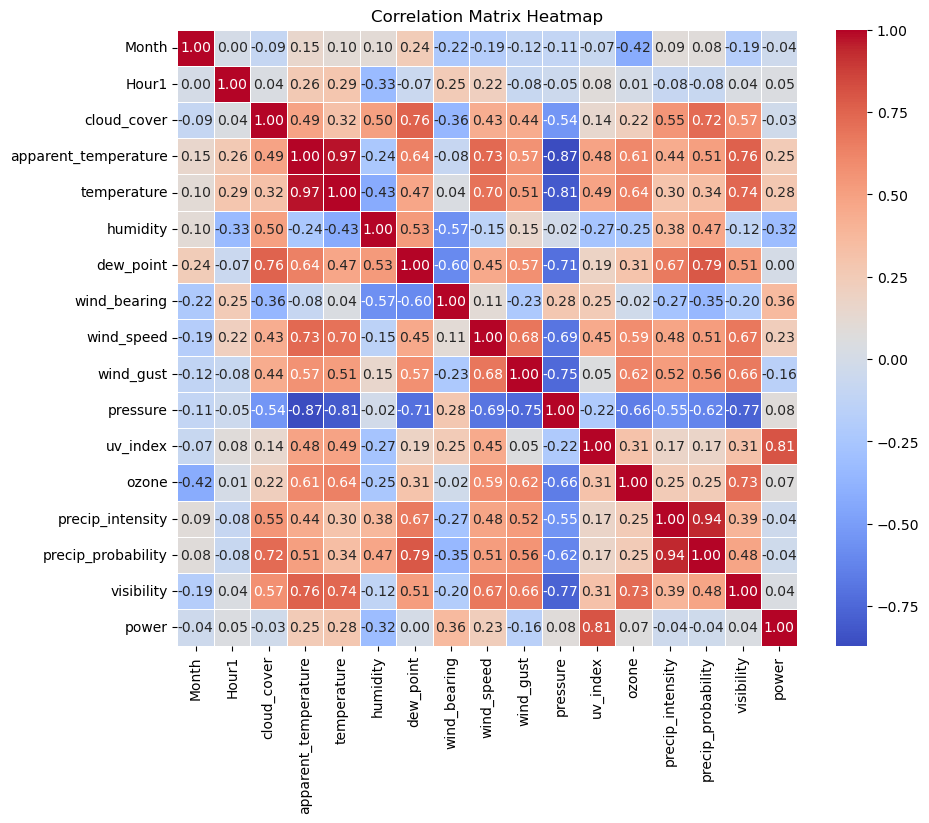

In [472]:
# Calculate the correlation matrix for numeric features
correlation_matrix = grouped_df[numeric_features].corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [473]:
grouped_df.drop(columns= ['dew_point', 'sunrise', 'sunset', 'updated_at', 'datet']).dtypes

Month                     int32
Hour1                     int32
datetime_utc             object
cloud_cover             float64
apparent_temperature    float64
temperature             float64
humidity                float64
wind_bearing            float64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                float64
ozone                   float64
precip_intensity        float64
precip_probability      float64
visibility              float64
icon                     object
power                   float64
dtype: object

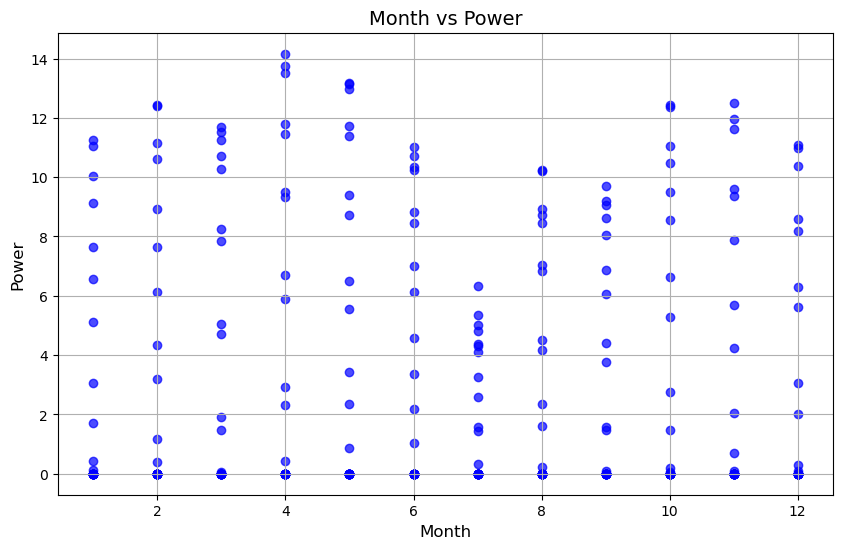

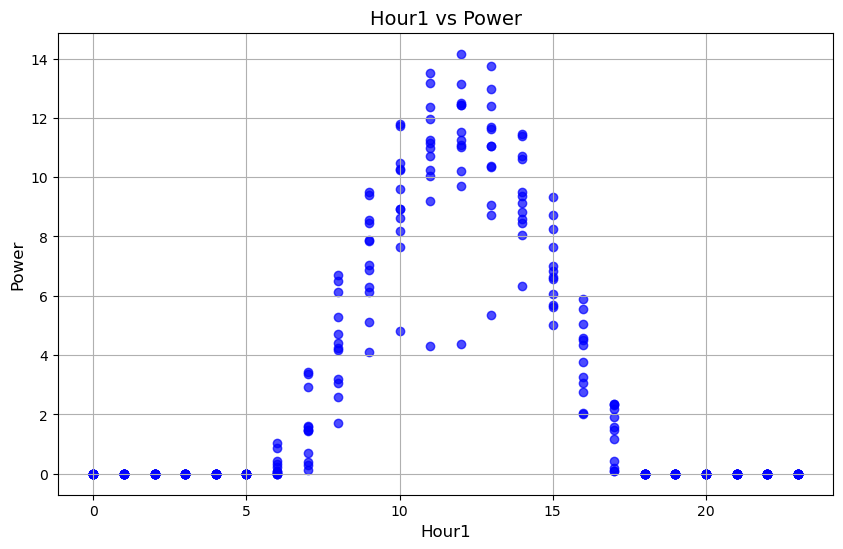

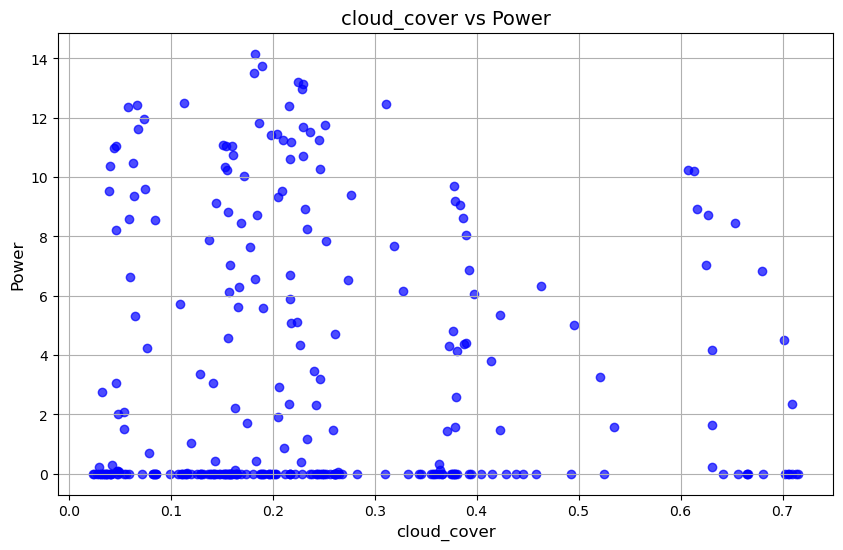

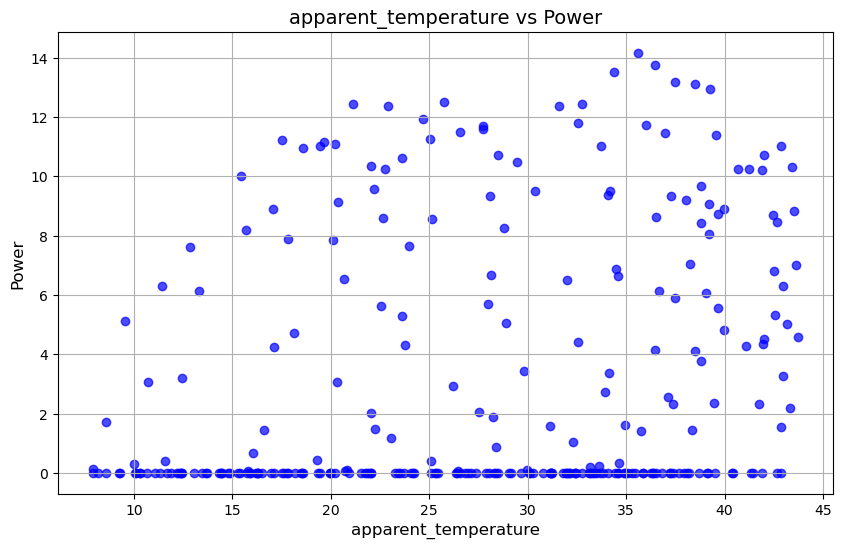

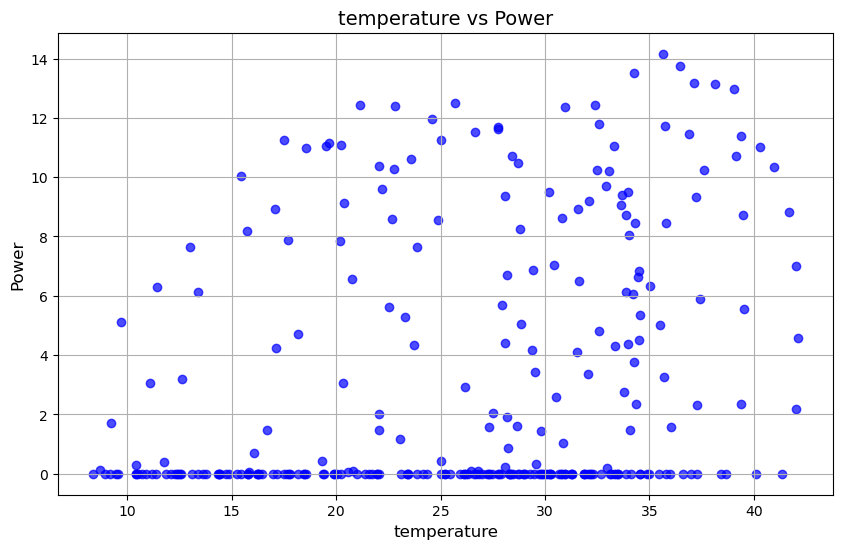

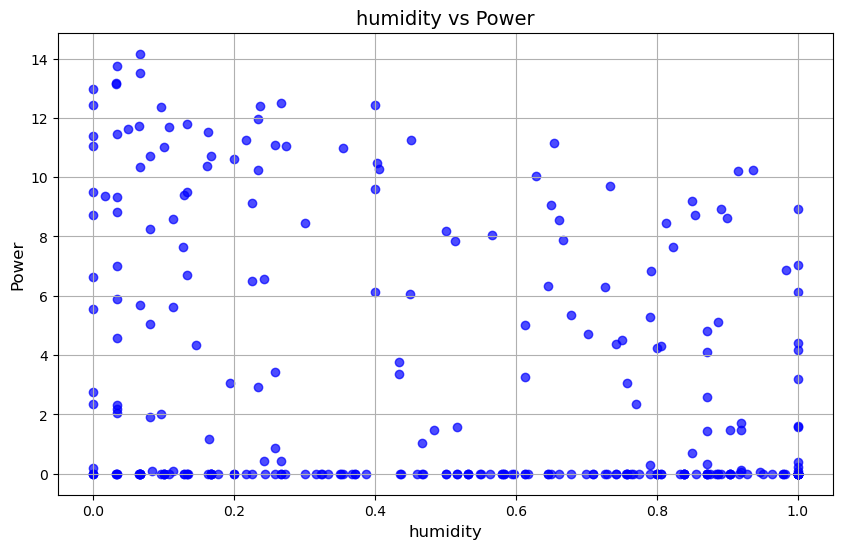

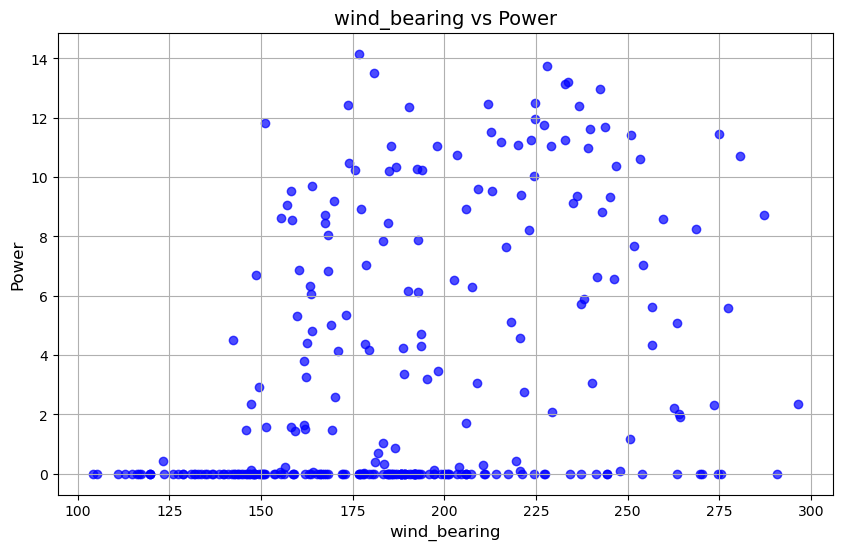

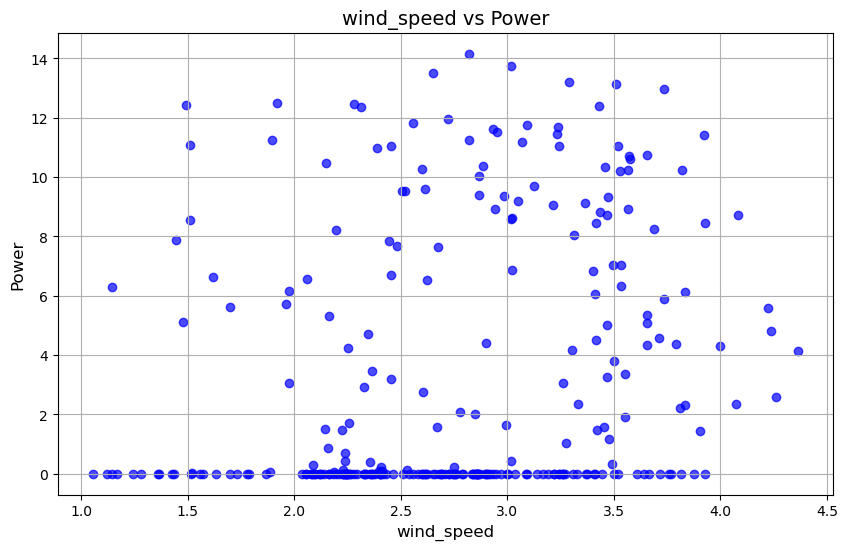

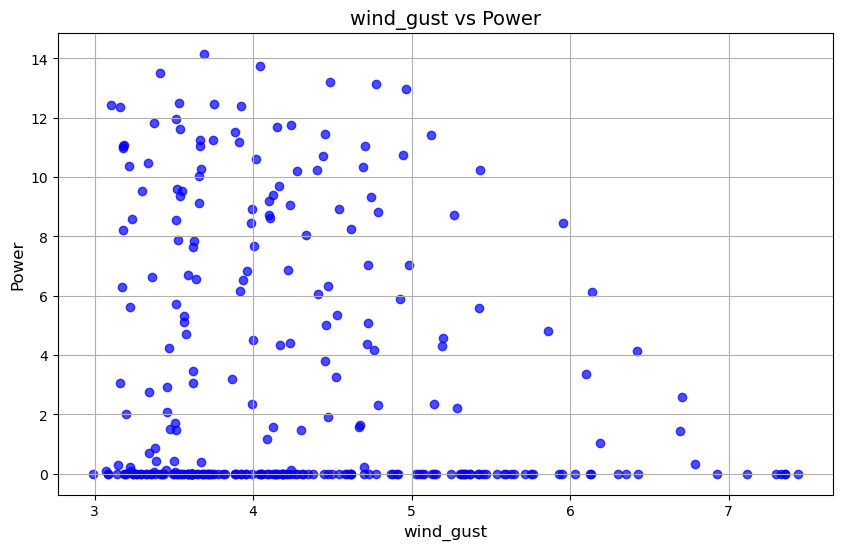

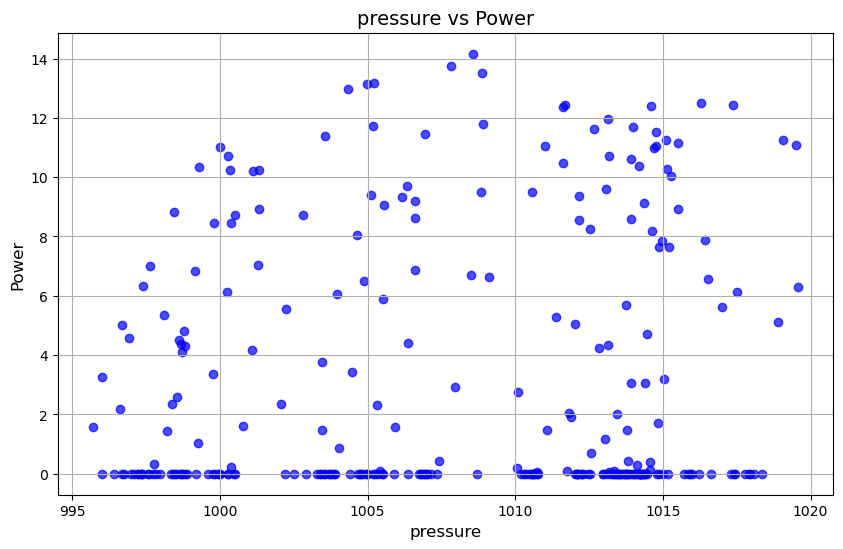

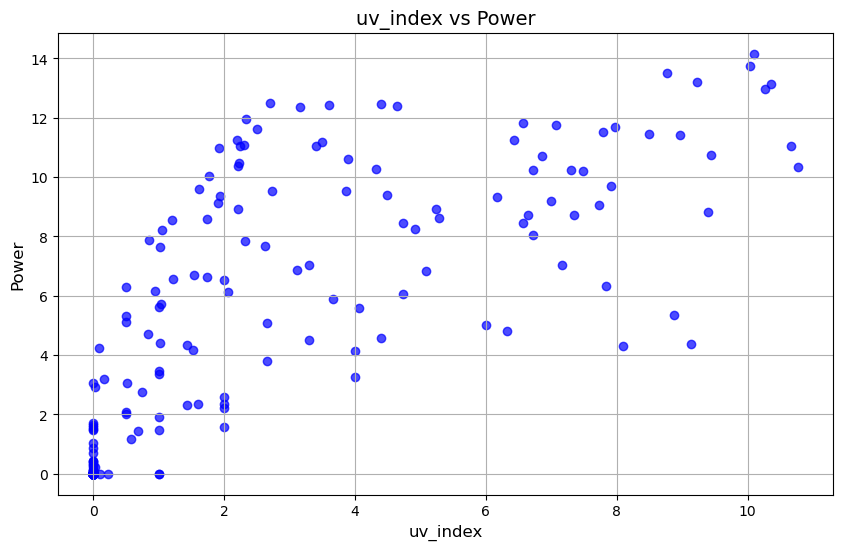

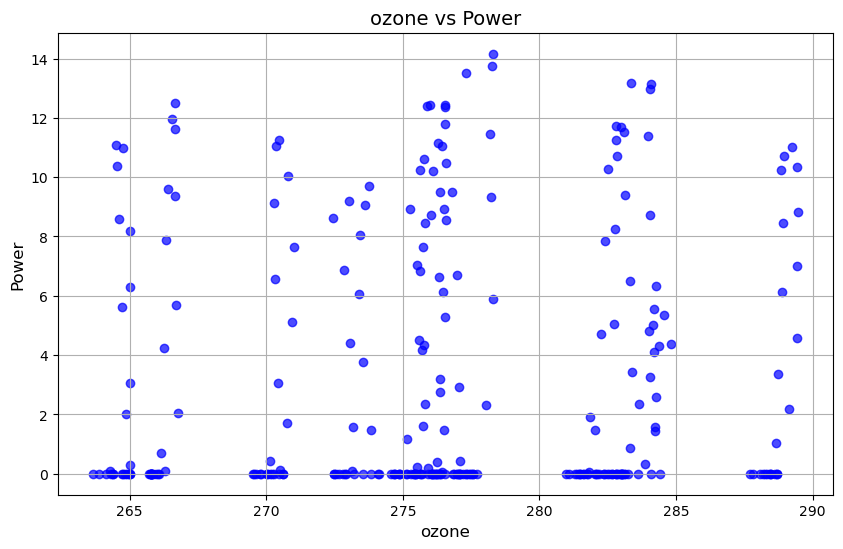

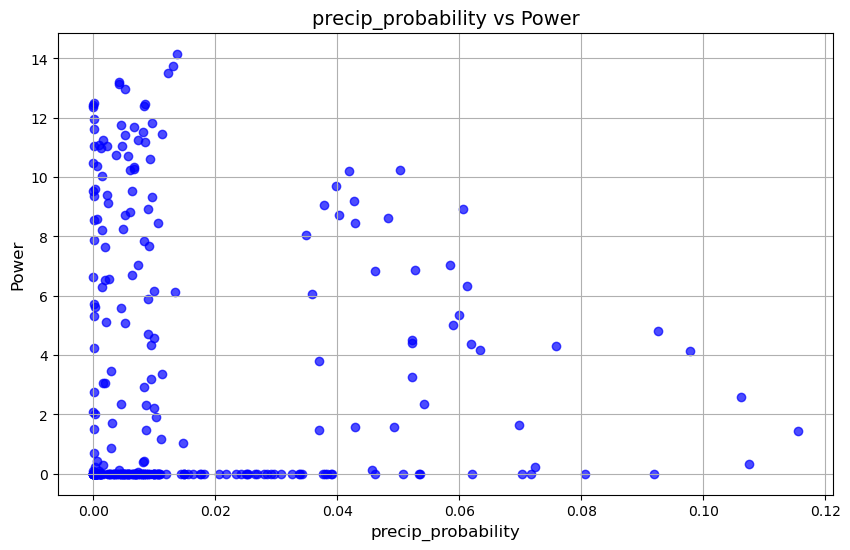

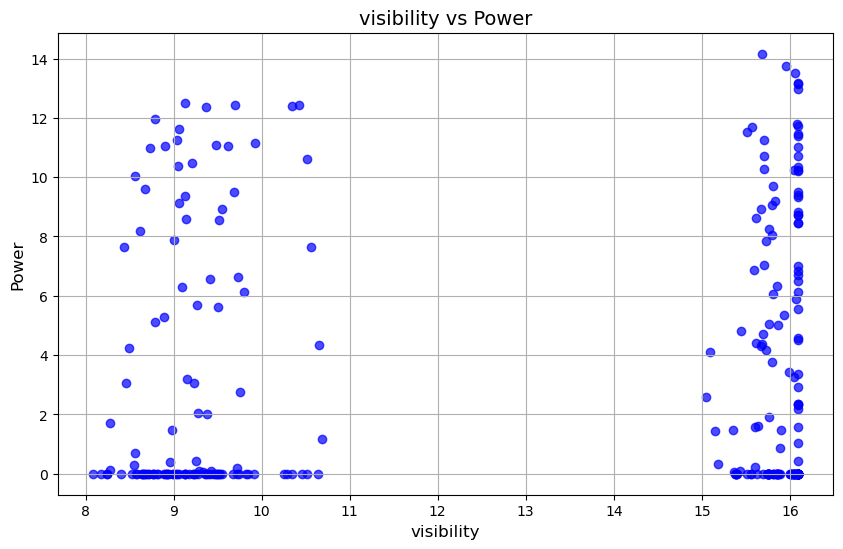

In [474]:
# Define the columns to analyze 
columns_to_plot = ["Month", "Hour1", "cloud_cover", "apparent_temperature", "temperature", "humidity", "wind_bearing", "wind_speed", "wind_gust", "pressure", "uv_index", "ozone", "precip_probability", "visibility"] 
# Plot each column (x-axis) against "power" (y-axis) 
for column in columns_to_plot: 
    plt.figure(figsize=(10, 6)) 
    plt.scatter(grouped_df[column], grouped_df["power"], alpha=0.7, color='blue') 
    plt.title(f'{column} vs Power', fontsize=14) 
    plt.xlabel(column, fontsize=12) 
    plt.ylabel("Power", fontsize=12) 
    plt.grid(True) 
    plt.show()

In [475]:
#grouped_df.iloc[:,5:9]
#grouped_df['summary'].nunique()
#grouped_df['cloud_cover'].unique()

In [476]:
grouped_df=grouped_df[["Month","Hour1","cloud_cover", "apparent_temperature", "temperature", "humidity", "wind_bearing", "wind_speed", "wind_gust", "icon","pressure", "uv_index","ozone","precip_probability","visibility","power"]]
# Convert to datetime if not already* done

In [477]:
grouped_df.loc[1]

Month                             1
Hour1                             1
cloud_cover                0.125484
apparent_temperature      10.641129
temperature               10.887097
humidity                   0.774194
wind_bearing             189.193548
wind_speed                 2.249677
wind_gust                  3.721613
icon                            fog
pressure                1014.455323
uv_index                        0.0
ozone                    269.551613
precip_probability         0.009839
visibility                 8.240645
power                           0.0
Name: 1, dtype: object

In [478]:
grouped_df.loc[:,'wind_speed'].min()

1.0570967741935484

In [479]:
float_columns = grouped_df.select_dtypes(include=['float']).columns
grouped_df[float_columns] = grouped_df[float_columns].round(2)

In [480]:
print(grouped_df['icon'].unique())
Features = df_weather_actual3['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['fog' 'clear-day' 'clear-night' 'partly-cloudy-day' 'partly-cloudy-night'
 'cloudy']
[1 3 3 ... 5 5 5]


In [481]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
print(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

[[1]
 [3]
 [3]
 ...
 [5]
 [5]
 [5]]


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [482]:
Features.shape

(13619, 8)

In [483]:
Features = np.concatenate([Features, np.array(df_weather_actual3[["Month", "Hour1", "cloud_cover", "apparent_temperature", "temperature", "humidity", "wind_bearing", "wind_speed", "wind_gust", "pressure", "uv_index", "ozone", 'precip_probability', "visibility"]])], axis = 1)
Features[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 2.6520e+01, 2.6000e+01, 1.0000e+00, 3.0800e+02,
        8.3000e-01, 3.7400e+00, 1.0079e+03, 0.0000e+00, 2.7560e+02,
        0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 1.0000e+00,
        0.0000e+00, 2.8780e+01, 2.7000e+01, 1.0000e+00, 1.7700e+02,
        2.5200e+00, 3.7400e+00, 1.0096e+03, 0.0000e+00, 2.7560e+02,
        0.0000e+00, 3.0600e+00]])

In [484]:
#Features = np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])

In [485]:
Features

array([[  0.  ,   1.  ,   0.  , ..., 275.6 ,   0.  ,   3.57],
       [  0.  ,   0.  ,   0.  , ..., 275.6 ,   0.  ,   3.06],
       [  0.  ,   0.  ,   0.  , ..., 275.6 ,   0.  ,   3.06],
       ...,
       [  0.  ,   0.  ,   0.  , ..., 268.4 ,   0.  ,  16.09],
       [  0.  ,   0.  ,   0.  , ..., 268.7 ,   0.  ,  16.09],
       [  0.  ,   0.  ,   0.  , ..., 268.7 ,   0.  ,  16.09]])

In [486]:
Features[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
       0.0000e+00, 2.6520e+01, 2.6000e+01, 1.0000e+00, 3.0800e+02,
       8.3000e-01, 3.7400e+00, 1.0079e+03, 0.0000e+00, 2.7560e+02,
       0.0000e+00, 3.5700e+00])

## Split the dataset

In [488]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual3['power'])
indx = range(Features.shape[0])
indx75 = ms.train_test_split(indx, test_size = 0.25, random_state=0)

# print(indx)
x_train_75 = Features[indx75[0],:]
y_train_75 = np.ravel(labels[indx75[0]])
x_test_25 = Features[indx75[1],:]
y_test_25 = np.ravel(labels[indx75[1]])


In [489]:
indx60 = ms.train_test_split(indx, test_size = 0.4, random_state=0)

# print(indx)
x_train_60 = Features[indx60[0],:]
y_train_60 = np.ravel(labels[indx60[0]])
x_test_40 = Features[indx60[1],:]
y_test_40 = np.ravel(labels[indx60[1]])

In [490]:
indx70 = ms.train_test_split(indx, test_size = 0.3, random_state=0)

# print(indx)
x_train_70 = Features[indx70[0],:]
y_train_70 = np.ravel(labels[indx70[0]])
x_test_30 = Features[indx70[1],:]
y_test_30 = np.ravel(labels[indx70[1]])

In [491]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual3['power'])
indx = range(Features.shape[0])
indx80 = ms.train_test_split(indx, test_size = 0.2, random_state=0)

# print(indx)
x_train_80 = Features[indx80[0],:]
y_train_80 = np.ravel(labels[indx80[0]])
x_test_20 = Features[indx80[1],:]
y_test_20 = np.ravel(labels[indx80[1]])

## Rescale Numeric features

In [493]:
x_train_75

array([[  1.  ,   0.  ,   0.  , ..., 279.7 ,   0.  ,  16.09],
       [  1.  ,   0.  ,   0.  , ..., 285.3 ,   0.  ,  16.09],
       [  0.  ,   0.  ,   0.  , ..., 275.6 ,   0.  ,   2.09],
       ...,
       [  1.  ,   0.  ,   0.  , ..., 273.6 ,   0.  ,  16.09],
       [  0.  ,   0.  ,   0.  , ..., 284.1 ,   0.  ,  16.09],
       [  0.  ,   0.  ,   0.  , ..., 275.6 ,   0.  ,   1.45]])

In [494]:
scaler = preprocessing.StandardScaler().fit(x_train_75[:,10:])
x_train_75[:,10:] = scaler.transform(x_train_75[:,10:])
x_test_25[:,10:] = scaler.transform(x_test_25[:,10:])
#print(x_train_75.shape)
x_train_75[:10,:]

# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# x_train[:5,:]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 10.        , 17.        ,
        -0.67512665,  0.48718027,  0.73923962, -1.08100763,  1.29243404,
        -1.18017079, -1.56323601,  0.34610358, -0.52870042,  0.37056561,
        -0.28184333,  0.61538303],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  5.        ,  8.        ,
        -0.67512665,  1.05374178,  1.41599802, -1.08100763,  0.74275473,
         0.6715911 ,  1.50405004, -1.37100607,  0.22524668,  0.79183348,
        -0.28184333,  0.61538303],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        , 12.        , 10.        ,
        -0.67512665, -0.77184532, -0.72707025, -1.08100763,  0.66822194,
         0.04632085, -0.19646606,  0.05451892, -0.52870042,  0.06213735,
        -0.28184333, -1.63121383],
       [ 1.        

In [495]:
scaler = preprocessing.StandardScaler().fit(x_train_70[:,10:])
x_train_70[:,10:] = scaler.transform(x_train_70[:,10:])
x_test_30[:,10:] = scaler.transform(x_test_30[:,10:])
#print(x_train_75.shape)
x_train_70[:10,:]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  5.        , 14.        ,
        -0.67601215,  1.46617954,  1.86938516, -1.0832851 ,  1.32519531,
         1.5701819 ,  1.16375847, -1.01026228,  3.23750238,  1.42597241,
        -0.2825561 ,  0.61463029],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  6.        , 21.        ,
        -0.32368617,  0.89309148,  1.19127067, -1.0832851 , -1.55491083,
        -0.08024735,  0.4044059 , -1.34459141, -0.52923144,  0.99563717,
        -0.2825561 ,  0.61463029],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        , 11.        , 14.        ,
         1.7902697 ,  0.57120702,  0.85221343, -1.0832851 , -1.3125718 ,
        -0.69715537, -1.09847942,  0.58379646,  0.60078871, -1.08054162,
        -0.2825561 ,  0.61463029],
       [ 0.        

In [496]:
scaler = preprocessing.StandardScaler().fit(x_train_80[:,10:])
x_train_80[:,10:] = scaler.transform(x_train_80[:,10:])
x_test_20[:,10:] = scaler.transform(x_test_20[:,10:])
#print(x_train_75.shape)
x_train_80[:10,:]

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  2.05741624e+00, -1.06842350e+00,
        -1.06809455e+00,  9.25228458e-01, -1.20474461e+00,
         1.49445370e-01,  4.90915189e-01,  9.71428546e-01,
        -5.31156723e-01, -4.86935997e-01, -2.81538753e-01,
         6.13015743e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.00000000e+00,
         1.00000000e+00,  1.38141425e+00,  1.00965386e+00,
         5.13465121e-01,  9.25228458e-01, -7.47310701e-01,
         4.29768925e-01,  1.19969146e+00, -1.14673831e+00,
        -5.31156723e-01, -6.15218652e-01, -2.81538753e-01,
         6.13015743e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    

In [497]:
scaler = preprocessing.StandardScaler().fit(x_train_60[:,10:])
x_train_60[:,10:] = scaler.transform(x_train_60[:,10:])
x_test_40[:,10:] = scaler.transform(x_test_40[:,10:])
#print(x_train_75.shape)
x_train_60[:10,:]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        , 11.        ,  2.        ,
        -0.67858641, -1.04465834, -1.07349418,  0.92076404, -0.09746979,
        -0.08337071, -0.20033628,  0.06074733, -0.52864806,  0.05273915,
        -0.28266337, -1.8674847 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  7.        , 22.        ,
         1.43005439,  0.61824926,  0.3946373 ,  0.92076404, -0.46969652,
         1.96066926,  2.67286997, -1.58407975, -0.52864806,  0.19628732,
         1.54957827,  0.61492985],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        , 10.        , 17.        ,
        -0.67858641,  0.8158508 ,  1.07223645, -1.08605457,  1.23324079,
         0.0438847 , -0.20033628,  0.06074733, -0.52864806,  0.05273915,
        -0.28266337, -1.56702417],
       [ 0.        

In [498]:
y_train_75.shape

(10214,)

In [499]:
## define and fit the linear regression model
lin_mod_75 = linear_model.LinearRegression(fit_intercept = False)
lin_mod_75.fit(x_train_75, y_train_75)

LinearRegression(fit_intercept=False)

In [500]:
## define and fit the linear regression model
lin_mod_70 = linear_model.LinearRegression(fit_intercept = False)
lin_mod_70.fit(x_train_70, y_train_70)

LinearRegression(fit_intercept=False)

In [501]:
## define and fit the linear regression model
lin_mod_80 = linear_model.LinearRegression(fit_intercept = False)
lin_mod_80.fit(x_train_80, y_train_80)

LinearRegression(fit_intercept=False)

In [502]:
## define and fit the linear regression model
lin_mod_60 = linear_model.LinearRegression(fit_intercept = False)
lin_mod_60.fit(x_train_60, y_train_60)

LinearRegression(fit_intercept=False)

## Intially empty your model folder

In [504]:
print(lin_mod_75.intercept_)
print(lin_mod_75.coef_)

0.0
[ 5.12041298  2.96273538  4.10746713  4.50694182  4.40494033  3.31270457
  2.61281921  6.40984543 -0.02132812 -0.07116046  0.19184506  1.62021049
 -0.12905425 -0.47014534  0.21152332  0.28827511 -0.18403292  1.60933654
  2.58980903 -0.11075587 -0.00762131 -1.05515159]


In [505]:
print(lin_mod_80.intercept_)
print(lin_mod_80.coef_)

0.0
[ 5.17413875  2.96849287  4.09761769  4.46954792  4.39666117  3.2943584
  2.6902849   6.22477137 -0.01923845 -0.07116682  0.21366884  1.58544433
 -0.14043    -0.46558202  0.22925113  0.32916276 -0.20306287  1.57872572
  2.58322987 -0.09571301 -0.02849219 -1.06301474]


In [506]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score_25 = lin_mod_75.predict(x_test_25) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test_25, y_score_25, 19)    

Mean Square Error      = 10.646105066222997
Root Mean Square Error = 3.2628369659275034
Mean Absolute Error    = 2.293389832697737
Median Absolute Error  = 1.5763010055799753
R^2                    = 0.549782359096473
Adjusted R^2           = 0.5473889989262829


In [507]:
def print_metrics_70(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score_30 = lin_mod_70.predict(x_test_30) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics_70(y_test_30, y_score_30, 19)    

Mean Square Error      = 10.540971690830887
Root Mean Square Error = 3.246686263073611
Mean Absolute Error    = 2.2930769432308447
Median Absolute Error  = 1.588108796361773
R^2                    = 0.5513898940346229
Adjusted R^2           = 0.5494044054908863


In [508]:
def print_metrics_80(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score_20 = lin_mod_80.predict(x_test_20) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics_80(y_test_20, y_score_20, 19)    

Mean Square Error      = 10.23283262668651
Root Mean Square Error = 3.1988799018854257
Mean Absolute Error    = 2.2457891749219856
Median Absolute Error  = 1.5446235665734753
R^2                    = 0.5593220699157396
Adjusted R^2           = 0.5563896474604655


In [509]:
def print_metrics_60(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score_40 = lin_mod_60.predict(x_test_40) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics_60(y_test_40, y_score_40, 19)    

Mean Square Error      = 10.689422928918843
Root Mean Square Error = 3.2694682945272375
Mean Absolute Error    = 2.308896844467655
Median Absolute Error  = 1.589749783291545
R^2                    = 0.5444550156618844
Adjusted R^2           = 0.542944643637923


# RandomForest Regression

# Manual Parameter Turning

In [512]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [513]:
# Example parameter values
n_estimators_list = [100, 150, 200, 250]

# Initialize storage for results
result1 = {}

# Iterate through each n_estimators value
for n_estimators in n_estimators_list:
    print(f"Evaluating n_estimators={n_estimators}")
    
    # Create the model with the current n_estimators and default parameters
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=9922)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Compute mean score and store it
    mean_score = np.mean(scores)
    result1[n_estimators] = mean_score
    print(f"Mean CV Score (Negative MSE): {mean_score}")

# Find the best n_estimators
best_n_estimators = max(result1, key=result1.get)
print(f"Best n_estimators: {best_n_estimators} with score: {result1[best_n_estimators]}")

Evaluating n_estimators=100
Mean CV Score (Negative MSE): -3.7069347056981963
Evaluating n_estimators=150
Mean CV Score (Negative MSE): -3.6864216068792914
Evaluating n_estimators=200
Mean CV Score (Negative MSE): -3.6738070381506858
Evaluating n_estimators=250
Mean CV Score (Negative MSE): -3.670491364521373
Best n_estimators: 250 with score: -3.670491364521373


In [514]:
# Example parameter values
n_estimators_list = [100, 150, 200, 250]

# Initialize storage for results
result1_cv = {}

# Iterate through each n_estimators value
for n_estimators in n_estimators_list:
    print(f"Evaluating n_estimators={n_estimators}")
    
    # Create the model with the current n_estimators and default parameters
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    scores_positive = -scores
    
    # Compute mean score
    mean_score = np.mean(scores_positive)
    
    # Store results: individual split scores and mean score
    result1_cv[n_estimators] = {
        'split_scores': scores_positive.tolist(),  # Convert to list for better readability
        'mean_score': mean_score
    }
    
    print(f"Split scores: {scores_positive}")
    print(f"Mean CV Score (MSE): {mean_score}")

# Display results for each n_estimators value
print("\nResults Summary:")
for n_estimators, scores_data in result1_cv.items():  # Use result1_cv here
    print(f"n_estimators={n_estimators}")
    print(f"  Split Scores: {scores_data['split_scores']}")
    print(f"  Mean Score: {scores_data['mean_score']}")
    
# Find the best n_estimators based on mean score
best_n_estimators = min(result1_cv, key=lambda x: result1_cv[x]['mean_score'])  # Use result1_cv here
print(f"\nBest n_estimators: {best_n_estimators} with Mean MSE: {result1_cv[best_n_estimators]['mean_score']}")

Evaluating n_estimators=100
Split scores: [3.75731258 4.00487844 3.76379176 3.74507663 3.26361412]
Mean CV Score (MSE): 3.7069347056981963
Evaluating n_estimators=150
Split scores: [3.73871799 3.96293457 3.76583687 3.72403559 3.24058302]
Mean CV Score (MSE): 3.6864216068792914
Evaluating n_estimators=200
Split scores: [3.72904168 3.94473003 3.73687522 3.71599295 3.24239531]
Mean CV Score (MSE): 3.6738070381506858
Evaluating n_estimators=250
Split scores: [3.73715564 3.92348005 3.73725998 3.71243074 3.24213043]
Mean CV Score (MSE): 3.670491364521373

Results Summary:
n_estimators=100
  Split Scores: [3.757312577859276, 4.00487844152623, 3.7637917592358, 3.745076627121387, 3.2636141227482893]
  Mean Score: 3.7069347056981963
n_estimators=150
  Split Scores: [3.738717985590688, 3.9629345654324433, 3.765836867701549, 3.724035591489471, 3.240583024182304]
  Mean Score: 3.6864216068792914
n_estimators=200
  Split Scores: [3.729041680374361, 3.9447300299815717, 3.736875219376068, 3.7159929476

#n-estimater for mse, rmse, mae, r^2 and adjusted r^2

In [516]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example parameter values
n_estimators_list = [100, 150, 200, 250]

# Initialize storage for results
result1_cv = {}

# Function to calculate Adjusted R²
def adjusted_r2_score(X, y, r2_score):
    n = X.shape[0]  # number of data points
    p = X.shape[1]  # number of features
    return 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Iterate through each n_estimators value
for n_estimators in n_estimators_list:
    print(f"Evaluating n_estimators={n_estimators}")
    
    # Create the model with the current n_estimators and default parameters
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    mse_scores = -scores
    
    # Calculate additional metrics for each fold
    rmse_scores = np.sqrt(mse_scores)  # RMSE
    mae_scores = np.mean(np.abs(mse_scores))  # MAE
    r2_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='r2')  # R² score
    
    # Compute mean values for each metric
    mean_mse = np.mean(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)
    adj_r2_scores = adjusted_r2_score(x_train_80, y_train_80, mean_r2)
    
    # Store results: individual split scores and mean score for each metric
    result1_cv[n_estimators] = {
        'split_mse_scores': mse_scores.tolist(),
        'split_rmse_scores': rmse_scores.tolist(),
        'split_mae_scores': mae_scores.tolist(),
        'split_r2_scores': r2_scores.tolist(),
        'mean_mse': mean_mse,
        'mean_rmse': mean_rmse,
        'mean_mae': mean_mae,
        'mean_r2': mean_r2,
        'adjusted_r2': adj_r2_scores
    }
    
    print(f"Split MSE scores: {mse_scores}")
    print(f"Split RMSE scores: {rmse_scores}")
    print(f"Split MAE scores: {mae_scores}")
    print(f"Split R² scores: {r2_scores}")
    print(f"Mean MSE: {mean_mse}")
    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean R²: {mean_r2}")
    print(f"Adjusted R²: {adj_r2_scores}")

# Display results for each n_estimators value
print("\nResults Summary:")
for n_estimators, scores_data in result1_cv.items():
    print(f"n_estimators={n_estimators}")
    print(f"  Split MSE Scores: {scores_data['split_mse_scores']}")
    print(f"  Split RMSE Scores: {scores_data['split_rmse_scores']}")
    print(f"  Split MAE Scores: {scores_data['split_mae_scores']}")
    print(f"  Split R² Scores: {scores_data['split_r2_scores']}")
    print(f"  Mean MSE: {scores_data['mean_mse']}")
    print(f"  Mean RMSE: {scores_data['mean_rmse']}")
    print(f"  Mean MAE: {scores_data['mean_mae']}")
    print(f"  Mean R²: {scores_data['mean_r2']}")
    print(f"  Adjusted R²: {scores_data['adjusted_r2']}")

# Find the best n_estimators based on mean R² score
best_n_estimators = max(result1_cv, key=lambda x: result1_cv[x]['mean_r2'])  # Use R² to find the best model
print(f"\nBest n_estimators: {best_n_estimators} with Mean R²: {result1_cv[best_n_estimators]['mean_r2']}")


Evaluating n_estimators=100
Split MSE scores: [3.75731258 4.00487844 3.76379176 3.74507663 3.26361412]
Split RMSE scores: [1.93837885 2.00121924 1.94004942 1.93522005 1.80654757]
Split MAE scores: 3.7069347056981963
Split R² scores: [0.83996157 0.82999436 0.831891   0.85088226 0.86173966]
Mean MSE: 3.7069347056981963
Mean RMSE: 1.924283025964559
Mean MAE: 3.7069347056981963
Mean R²: 0.8428937714228228
Adjusted R²: 0.8425758596284246
Evaluating n_estimators=150
Split MSE scores: [3.73871799 3.96293457 3.76583687 3.72403559 3.24058302]
Split RMSE scores: [1.93357648 1.99071207 1.94057643 1.92977605 1.80016194]
Split MAE scores: 3.6864216068792914
Split R² scores: [0.84075358 0.83177487 0.83179966 0.85172005 0.86271536]
Mean MSE: 3.6864216068792914
Mean RMSE: 1.9189605935440661
Mean MAE: 3.6864216068792914
Mean R²: 0.843752703027242
Adjusted R²: 0.8434365293210794
Evaluating n_estimators=200
Split MSE scores: [3.72904168 3.94473003 3.73687522 3.71599295 3.24239531]
Split RMSE scores: [1.9

# Max Depth

In [518]:
# Best n_estimators value identified earlier
best_n_estimators = 200

# Example parameter values for max_depth to evaluate
max_depth_list = [5, 10, 15, 20, None]  # None means no limit on depth

# Initialize storage for results for max_depth
result2_cv = {}

# Iterate through each max_depth value
for max_depth in max_depth_list:
    print(f"Evaluating max_depth={max_depth}")
    
    # Create the model with the best n_estimators and current max_depth
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=max_depth, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    scores_positive = -scores
    
    # Compute mean score
    mean_score = np.mean(scores_positive)
    
    # Store results: individual split scores and mean score
    result2_cv[max_depth] = {
        'split_scores': scores_positive.tolist(),  # Convert to list for better readability
        'mean_score': mean_score
    }
    
    print(f"Split scores: {scores_positive}")
    print(f"Mean CV Score (MSE): {mean_score}")

# Display results for each max_depth value
print("\nResults Summary for max_depth:")
for max_depth, scores_data in result2_cv.items():
    print(f"max_depth={max_depth}")
    print(f"  Split Scores: {scores_data['split_scores']}")
    print(f"  Mean Score: {scores_data['mean_score']}")

# Find the best max_depth based on mean score
best_max_depth = min(result2_cv, key=lambda x: result2_cv[x]['mean_score'])
print(f"\nBest max_depth: {best_max_depth} with Mean MSE: {result2_cv[best_max_depth]['mean_score']}")

Evaluating max_depth=5
Split scores: [5.46733594 5.63288546 5.2783347  5.15117665 4.82832574]
Mean CV Score (MSE): 5.271611698833769
Evaluating max_depth=10
Split scores: [4.03531768 4.26047906 3.9960021  4.00611547 3.5519181 ]
Mean CV Score (MSE): 3.9699664804341226
Evaluating max_depth=15
Split scores: [3.737823   3.97816603 3.7711491  3.72772104 3.28059235]
Mean CV Score (MSE): 3.6990903051603157
Evaluating max_depth=20
Split scores: [3.7295669  3.92416213 3.74330203 3.72151959 3.23877959]
Mean CV Score (MSE): 3.671466048537996
Evaluating max_depth=None
Split scores: [3.72904168 3.94473003 3.73687522 3.71599295 3.24239531]
Mean CV Score (MSE): 3.6738070381506858

Results Summary for max_depth:
max_depth=5
  Split Scores: [5.467335939040024, 5.632885464165565, 5.278334703574945, 5.151176651029537, 4.828325736358774]
  Mean Score: 5.271611698833769
max_depth=10
  Split Scores: [4.03531768382554, 4.260479057479158, 3.996002096522089, 4.006115468435453, 3.5519180959083685]
  Mean Score:

In [519]:
#max-depth for mse, rmse, mae, r^2, adjusted r^2

In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Best n_estimators value identified earlier
best_n_estimators = 200

# Example parameter values for max_depth to evaluate
max_depth_list = [5, 10, 15, 20, None]  # None means no limit on depth

# Initialize storage for results for max_depth
result2_cv = {}

# Function to calculate Adjusted R²
def adjusted_r2_score(X, y, r2_score):
    n = X.shape[0]  # number of data points
    p = X.shape[1]  # number of features
    return 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Iterate through each max_depth value
for max_depth in max_depth_list:
    print(f"Evaluating max_depth={max_depth}")
    
    # Create the model with the best n_estimators and current max_depth
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=max_depth, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    mse_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    mse_scores_positive = -mse_scores
    
    # Calculate additional metrics for each fold
    rmse_scores = np.sqrt(mse_scores_positive)  # RMSE
    mae_scores = np.mean(np.abs(mse_scores_positive))  # MAE (approximation)
    r2_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='r2')  # R² score
    
    # Compute mean values for each metric
    mean_mse = np.mean(mse_scores_positive)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)
    adj_r2 = adjusted_r2_score(x_train_80, y_train_80, mean_r2)
    
    # Store results: individual split scores and mean score for each metric
    result2_cv[max_depth] = {
        'split_mse_scores': mse_scores_positive.tolist(),
        'split_rmse_scores': rmse_scores.tolist(),
        'split_mae_scores': mae_scores.tolist(),
        'split_r2_scores': r2_scores.tolist(),
        'mean_mse': mean_mse,
        'mean_rmse': mean_rmse,
        'mean_mae': mean_mae,
        'mean_r2': mean_r2,
        'adjusted_r2': adj_r2
    }
    
    print(f"Split MSE scores: {mse_scores_positive}")
    print(f"Split RMSE scores: {rmse_scores}")
    print(f"Split MAE scores: {mae_scores}")
    print(f"Split R² scores: {r2_scores}")
    print(f"Mean MSE: {mean_mse}")
    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean R²: {mean_r2}")
    print(f"Adjusted R²: {adj_r2}")

# Display results for each max_depth value
print("\nResults Summary for max_depth:")
for max_depth, scores_data in result2_cv.items():
    print(f"max_depth={max_depth}")
    print(f"  Split MSE Scores: {scores_data['split_mse_scores']}")
    print(f"  Split RMSE Scores: {scores_data['split_rmse_scores']}")
    print(f"  Split MAE Scores: {scores_data['split_mae_scores']}")
    print(f"  Split R² Scores: {scores_data['split_r2_scores']}")
    print(f"  Mean MSE: {scores_data['mean_mse']}")
    print(f"  Mean RMSE: {scores_data['mean_rmse']}")
    print(f"  Mean MAE: {scores_data['mean_mae']}")
    print(f"  Mean R²: {scores_data['mean_r2']}")
    print(f"  Adjusted R²: {scores_data['adjusted_r2']}")

# Find the best max_depth based on mean R² score
best_max_depth = max(result2_cv, key=lambda x: result2_cv[x]['mean_r2'])  # Use R² to find the best model
print(f"\nBest max_depth: {best_max_depth} with Mean R²: {result2_cv[best_max_depth]['mean_r2']}")


Evaluating max_depth=5
Split MSE scores: [5.46733594 5.63288546 5.2783347  5.15117665 4.82832574]
Split RMSE scores: [2.33823351 2.37337006 2.29746267 2.26962038 2.19734516]
Split MAE scores: 5.271611698833769
Split R² scores: [0.76712508 0.76088606 0.76424425 0.79489556 0.79545194]
Mean MSE: 5.271611698833769
Mean RMSE: 2.295206354351561
Mean MAE: 5.271611698833769
Mean R²: 0.776520577597834
Adjusted R²: 0.776068356544408
Evaluating max_depth=10
Split MSE scores: [4.03531768 4.26047906 3.9960021  4.00611547 3.5519181 ]
Split RMSE scores: [2.00881002 2.06409279 1.99900027 2.00152828 1.88465331]
Split MAE scores: 3.9699664804341226
Split R² scores: [0.82812026 0.81914421 0.82151938 0.84048847 0.8495259 ]
Mean MSE: 3.9699664804341226
Mean RMSE: 1.9916169352750512
Mean MAE: 3.9699664804341226
Mean R²: 0.8317596439484474
Adjusted R²: 0.8314192017268567
Evaluating max_depth=15
Split MSE scores: [3.737823   3.97816603 3.7711491  3.72772104 3.28059235]
Split RMSE scores: [1.93334503 1.9945340

In [521]:
# Best n_estimators and max_depth values identified earlier
best_n_estimators = 200
best_max_depth = 20  # You can update this to the best max_depth you found

# Example parameter values for min_samples_split to evaluate
min_samples_split_list = [2, 5, 10]

# Initialize storage for results for min_samples_split
result4_min_samples_split = {}

# Iterate through each min_samples_split value
for min_samples_split in min_samples_split_list:
    print(f"\nEvaluating min_samples_split={min_samples_split}")
    
    # Create the model with the best n_estimators, max_depth, and current min_samples_split
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                     min_samples_split=min_samples_split, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    scores_positive = -scores
    
    # Compute mean score
    mean_score = np.mean(scores_positive)
    
    # Store results: individual split scores and mean score
    result4_min_samples_split[min_samples_split] = {
        'split_scores': scores_positive.tolist(),  # Convert to list for better readability
        'mean_score': mean_score
    }
    
    # Print split scores for each fold
    print(f"Split scores (per fold): {scores_positive}")
    print(f"Mean CV Score (MSE): {mean_score}")

# Display results for each min_samples_split value
print("\nResults Summary for min_samples_split:")
for min_samples_split, scores_data in result4_min_samples_split.items():
    print(f"min_samples_split={min_samples_split}")
    print(f"  Split Scores: {scores_data['split_scores']}")
    print(f"  Mean Score: {scores_data['mean_score']}")

# Find the best min_samples_split based on mean score
best_min_samples_split = min(result4_min_samples_split, key=lambda x: result4_min_samples_split[x]['mean_score'])
print(f"\nBest min_samples_split: {best_min_samples_split} with Mean MSE: {result4_min_samples_split[best_min_samples_split]['mean_score']}")



Evaluating min_samples_split=2
Split scores (per fold): [3.7295669  3.92416213 3.74330203 3.72151959 3.23877959]
Mean CV Score (MSE): 3.671466048537996

Evaluating min_samples_split=5
Split scores (per fold): [3.74439703 3.99589774 3.78243379 3.75705311 3.30573381]
Mean CV Score (MSE): 3.717103093825611

Evaluating min_samples_split=10
Split scores (per fold): [3.84190406 4.13488491 3.88074624 3.88587156 3.42252325]
Mean CV Score (MSE): 3.833186005034352

Results Summary for min_samples_split:
min_samples_split=2
  Split Scores: [3.7295669049624944, 3.924162128687219, 3.7433020313450553, 3.7215195897545077, 3.2387795879407046]
  Mean Score: 3.671466048537996
min_samples_split=5
  Split Scores: [3.74439702575919, 3.995897739501177, 3.7824337851862997, 3.757053112386585, 3.305733806294802]
  Mean Score: 3.717103093825611
min_samples_split=10
  Split Scores: [3.841904057435712, 4.134884910845448, 3.8807462448750027, 3.88587155830981, 3.4225232537057875]
  Mean Score: 3.833186005034352

B

In [522]:
# Best n_estimators and max_depth values identified earlier
best_n_estimators = 200
best_max_depth = 20  # You can update this to the best max_depth you found
best_min_samples_split = 2  # From the previous result

# Example parameter values for min_samples_leaf to evaluate
min_samples_leaf_list = [1, 2, 4]

# Initialize storage for results for min_samples_leaf
result5_min_samples_leaf = {}

# Iterate through each min_samples_leaf value
for min_samples_leaf in min_samples_leaf_list:
    print(f"\nEvaluating min_samples_leaf={min_samples_leaf}")
    
    # Create the model with the best n_estimators, max_depth, min_samples_split, and current min_samples_leaf
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                     min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf,
                                     random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    scores_positive = -scores
    
    # Compute mean score
    mean_score = np.mean(scores_positive)
    
    # Store results: individual split scores and mean score
    result5_min_samples_leaf[min_samples_leaf] = {
        'split_scores': scores_positive.tolist(),  # Convert to list for better readability
        'mean_score': mean_score
    }
    
    # Print split scores for each fold
    print(f"Split scores (per fold): {scores_positive}")
    print(f"Mean CV Score (MSE): {mean_score}")

# Display results for each min_samples_leaf value
print("\nResults Summary for min_samples_leaf:")
for min_samples_leaf, scores_data in result5_min_samples_leaf.items():
    print(f"min_samples_leaf={min_samples_leaf}")
    print(f"  Split Scores: {scores_data['split_scores']}")
    print(f"  Mean Score: {scores_data['mean_score']}")

# Find the best min_samples_leaf based on mean score
best_min_samples_leaf = min(result5_min_samples_leaf, key=lambda x: result5_min_samples_leaf[x]['mean_score'])
print(f"\nBest min_samples_leaf: {best_min_samples_leaf} with Mean MSE: {result5_min_samples_leaf[best_min_samples_leaf]['mean_score']}")



Evaluating min_samples_leaf=1
Split scores (per fold): [3.7295669  3.92416213 3.74330203 3.72151959 3.23877959]
Mean CV Score (MSE): 3.671466048537996

Evaluating min_samples_leaf=2
Split scores (per fold): [3.74388582 4.0071276  3.80281968 3.74046331 3.2891504 ]
Mean CV Score (MSE): 3.7166893613897543

Evaluating min_samples_leaf=4
Split scores (per fold): [3.84691088 4.17196129 3.98685851 3.83757537 3.39947128]
Mean CV Score (MSE): 3.84855546517882

Results Summary for min_samples_leaf:
min_samples_leaf=1
  Split Scores: [3.7295669049624944, 3.924162128687219, 3.7433020313450553, 3.7215195897545077, 3.2387795879407046]
  Mean Score: 3.671466048537996
min_samples_leaf=2
  Split Scores: [3.743885819098446, 4.007127600067735, 3.8028196755994963, 3.7404633120033655, 3.289150400179728]
  Mean Score: 3.7166893613897543
min_samples_leaf=4
  Split Scores: [3.8469108823881695, 4.171961288581309, 3.986858506439309, 3.8375753668186467, 3.3994712816666643]
  Mean Score: 3.84855546517882

Best m

In [523]:
# Example values for max_features to evaluate
max_features_list = ['sqrt', 'log2']

# Initialize storage for results for max_features
result6_max_features = {}

# Iterate through each max_features value
for max_features in max_features_list:
    print(f"\nEvaluating max_features={max_features}")
    
    # Create the model with the best hyperparameters and the current max_features
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                     min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                     max_features=max_features, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    scores_positive = -scores
    
    # Compute mean score
    mean_score = np.mean(scores_positive)
    
    # Store results: individual split scores and mean score
    result6_max_features[max_features] = {
        'split_scores': scores_positive.tolist(),  # Convert to list for better readability
        'mean_score': mean_score
    }
    
    # Print split scores for each fold
    print(f"Split scores (per fold): {scores_positive}")
    print(f"Mean CV Score (MSE): {mean_score}")

# Display results for each max_features value
print("\nResults Summary for max_features:")
for max_features, scores_data in result6_max_features.items():
    print(f"max_features={max_features}")
    print(f"  Split Scores: {scores_data['split_scores']}")
    print(f"  Mean Score: {scores_data['mean_score']}")

# Find the best max_features based on mean score
best_max_features = min(result6_max_features, key=lambda x: result6_max_features[x]['mean_score'])
print(f"\nBest max_features: {best_max_features} with Mean MSE: {result6_max_features[best_max_features]['mean_score']}")



Evaluating max_features=sqrt
Split scores (per fold): [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Mean CV Score (MSE): 3.7028885032773204

Evaluating max_features=log2
Split scores (per fold): [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Mean CV Score (MSE): 3.7028885032773204

Results Summary for max_features:
max_features=sqrt
  Split Scores: [3.9900988716065675, 3.9251217773848426, 3.6494276131467034, 3.509170474018897, 3.4406237802295916]
  Mean Score: 3.7028885032773204
max_features=log2
  Split Scores: [3.9900988716065675, 3.9251217773848426, 3.6494276131467034, 3.509170474018897, 3.4406237802295916]
  Mean Score: 3.7028885032773204

Best max_features: sqrt with Mean MSE: 3.7028885032773204


In [524]:
#max-feature for mse, rmse, mae, r^2, adjusted r^2

In [525]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Best hyperparameters identified earlier (e.g., n_estimators, max_depth, etc.)
best_n_estimators = 200
best_max_depth = 20
best_min_samples_split = 2  # Example value
best_min_samples_leaf = 1  # Example value

# Example values for max_features to evaluate
max_features_list = ['sqrt', 'log2']

# Initialize storage for results for max_features
result6_max_features = {}

# Function to calculate Adjusted R²
def adjusted_r2_score(X, y, r2_score):
    n = X.shape[0]  # number of data points
    p = X.shape[1]  # number of features
    return 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Iterate through each max_features value
for max_features in max_features_list:
    print(f"\nEvaluating max_features={max_features}")
    
    # Create the model with the best hyperparameters and the current max_features
    rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                     min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                     max_features=max_features, random_state=9922)
    
    # Perform 5-fold cross-validation and store scores for each split
    mse_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative scores to positive MSE
    mse_scores_positive = -mse_scores
    
    # Calculate additional metrics for each fold
    rmse_scores = np.sqrt(mse_scores_positive)  # RMSE
    mae_scores = np.mean(np.abs(mse_scores_positive))  # MAE (approximation)
    r2_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='r2')  # R² score
    
    # Compute mean values for each metric
    mean_mse = np.mean(mse_scores_positive)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)
    adj_r2 = adjusted_r2_score(x_train_80, y_train_80, mean_r2)
    
    # Store results: individual split scores and mean score for each metric
    result6_max_features[max_features] = {
        'split_mse_scores': mse_scores_positive.tolist(),
        'split_rmse_scores': rmse_scores.tolist(),
        'split_mae_scores': mae_scores.tolist(),
        'split_r2_scores': r2_scores.tolist(),
        'mean_mse': mean_mse,
        'mean_rmse': mean_rmse,
        'mean_mae': mean_mae,
        'mean_r2': mean_r2,
        'adjusted_r2': adj_r2
    }
    
    print(f"Split MSE scores: {mse_scores_positive}")
    print(f"Split RMSE scores: {rmse_scores}")
    print(f"Split MAE scores: {mae_scores}")
    print(f"Split R² scores: {r2_scores}")
    print(f"Mean MSE: {mean_mse}")
    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean R²: {mean_r2}")
    print(f"Adjusted R²: {adj_r2}")

# Display results for each max_features value
print("\nResults Summary for max_features:")
for max_features, scores_data in result6_max_features.items():
    print(f"max_features={max_features}")
    print(f"  Split MSE Scores: {scores_data['split_mse_scores']}")
    print(f"  Split RMSE Scores: {scores_data['split_rmse_scores']}")
    print(f"  Split MAE Scores: {scores_data['split_mae_scores']}")
    print(f"  Split R² Scores: {scores_data['split_r2_scores']}")
    print(f"  Mean MSE: {scores_data['mean_mse']}")
    print(f"  Mean RMSE: {scores_data['mean_rmse']}")
    print(f"  Mean MAE: {scores_data['mean_mae']}")
    print(f"  Mean R²: {scores_data['mean_r2']}")
    print(f"  Adjusted R²: {scores_data['adjusted_r2']}")

# Find the best max_features based on mean R² score
best_max_features = max(result6_max_features, key=lambda x: result6_max_features[x]['mean_r2'])  # Use R² to find the best model
print(f"\nBest max_features: {best_max_features} with Mean R²: {result6_max_features[best_max_features]['mean_r2']}")



Evaluating max_features=sqrt
Split MSE scores: [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Split RMSE scores: [1.99752318 1.98119201 1.91034751 1.873278   1.85489185]
Split MAE scores: 3.7028885032773204
Split R² scores: [0.8300463  0.83338001 0.83699906 0.86027533 0.85424079]
Mean MSE: 3.7028885032773204
Mean RMSE: 1.9234465116495187
Mean MAE: 3.7028885032773204
Mean R²: 0.8429882984062775
Adjusted R²: 0.8426705778916471

Evaluating max_features=log2
Split MSE scores: [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Split RMSE scores: [1.99752318 1.98119201 1.91034751 1.873278   1.85489185]
Split MAE scores: 3.7028885032773204
Split R² scores: [0.8300463  0.83338001 0.83699906 0.86027533 0.85424079]
Mean MSE: 3.7028885032773204
Mean RMSE: 1.9234465116495187
Mean MAE: 3.7028885032773204
Mean R²: 0.8429882984062775
Adjusted R²: 0.8426705778916471

Results Summary for max_features:
max_features=sqrt
  Split MSE Scores: [3.9900988716065675, 3.9251217773848426, 3.6494

In [526]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Best hyperparameters identified earlier (e.g., n_estimators, max_depth, etc.)
best_n_estimators = 200
best_max_depth = 20
best_min_samples_split = 2
best_min_samples_leaf = 1

# Example values for max_features to evaluate
max_features_list = ['sqrt', 'log2', 'none', 'auto']

# Initialize storage for results for max_features
result6_max_features = {}

# Function to calculate Adjusted R²
def adjusted_r2_score(X, y, r2_score):
    n = X.shape[0]  # number of data points
    p = X.shape[1]  # number of features
    return 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Iterate through each max_features value
for max_features in max_features_list:
    print(f"\nEvaluating max_features={max_features}")

    # Create the model with the best hyperparameters and the current max_features
    # Handling different max_features values properly
    if max_features == 'none':
        rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                          min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                          max_features=None, random_state=9922)
    elif max_features == 'auto':
        rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                          min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                          max_features='sqrt', random_state=9922)  # Map 'auto' to 'sqrt'
    else:
        rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                          min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                          max_features=max_features, random_state=9922)

    # The rest of the code for cross-validation and metric calculations remains the same...

    # Perform 5-fold cross-validation and store scores for each split
    mse_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')

    # Convert negative scores to positive MSE
    mse_scores_positive = -mse_scores

    # Calculate additional metrics for each fold
    rmse_scores = np.sqrt(mse_scores_positive)  # RMSE
    mae_scores = np.mean(np.abs(mse_scores_positive))  # MAE (approximation)
    r2_scores = cross_val_score(rf_model, x_train_80, y_train_80, cv=5, scoring='r2')  # R² score

    # Compute mean values for each metric
    mean_mse = np.mean(mse_scores_positive)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)
    adj_r2 = adjusted_r2_score(x_train_80, y_train_80, mean_r2)

    # Store results: individual split scores and mean score for each metric
    result6_max_features[max_features] = {
       'split_mse_scores': mse_scores_positive.tolist(),
       'split_rmse_scores': rmse_scores.tolist(),
       'split_mae_scores': mae_scores.tolist(),
       'split_r2_scores': r2_scores.tolist(),
       'mean_mse': mean_mse,
       'mean_rmse': mean_rmse,
       'mean_mae': mean_mae,
       'mean_r2': mean_r2,
       'adjusted_r2': adj_r2
    }

    print(f"Split MSE scores: {mse_scores_positive}")
    print(f"Split RMSE scores: {rmse_scores}")
    print(f"Split MAE scores: {mae_scores}")
    print(f"Split R² scores: {r2_scores}")
    print(f"Mean MSE: {mean_mse}")
    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean R²: {mean_r2}")
    print(f"Adjusted R²: {adj_r2}")

# Display results for each max_features value
print("\nResults Summary for max_features:")
for max_features, scores_data in result6_max_features.items():
    print(f"max_features={max_features}")
    print(f"  Split MSE Scores: {scores_data['split_mse_scores']}")
    print(f"  Split RMSE Scores: {scores_data['split_rmse_scores']}")
    print(f"  Split MAE Scores: {scores_data['split_mae_scores']}")
    print(f"  Split R² Scores: {scores_data['split_r2_scores']}")
    print(f"  Mean MSE: {scores_data['mean_mse']}")
    print(f"  Mean RMSE: {scores_data['mean_rmse']}")
    print(f"  Mean MAE: {scores_data['mean_mae']}")
    print(f"  Mean R²: {scores_data['mean_r2']}")
    print(f"  Adjusted R²: {scores_data['adjusted_r2']}")

# Find the best max_features based on mean R² score
best_max_features = max(result6_max_features, key=lambda x: result6_max_features[x]['mean_r2'])  # Use R² to find the best model
print(f"\nBest max_features: {best_max_features} with Mean R²: {result6_max_features[best_max_features]['mean_r2']}")


Evaluating max_features=sqrt
Split MSE scores: [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Split RMSE scores: [1.99752318 1.98119201 1.91034751 1.873278   1.85489185]
Split MAE scores: 3.7028885032773204
Split R² scores: [0.8300463  0.83338001 0.83699906 0.86027533 0.85424079]
Mean MSE: 3.7028885032773204
Mean RMSE: 1.9234465116495187
Mean MAE: 3.7028885032773204
Mean R²: 0.8429882984062775
Adjusted R²: 0.8426705778916471

Evaluating max_features=log2
Split MSE scores: [3.99009887 3.92512178 3.64942761 3.50917047 3.44062378]
Split RMSE scores: [1.99752318 1.98119201 1.91034751 1.873278   1.85489185]
Split MAE scores: 3.7028885032773204
Split R² scores: [0.8300463  0.83338001 0.83699906 0.86027533 0.85424079]
Mean MSE: 3.7028885032773204
Mean RMSE: 1.9234465116495187
Mean MAE: 3.7028885032773204
Mean R²: 0.8429882984062775
Adjusted R²: 0.8426705778916471

Evaluating max_features=none
Split MSE scores: [3.7295669  3.92416213 3.74330203 3.72151959 3.23877959]
Split RMSE scor

In [527]:
print(result5_min_samples_leaf)

{1: {'split_scores': [3.7295669049624944, 3.924162128687219, 3.7433020313450553, 3.7215195897545077, 3.2387795879407046], 'mean_score': 3.671466048537996}, 2: {'split_scores': [3.743885819098446, 4.007127600067735, 3.8028196755994963, 3.7404633120033655, 3.289150400179728], 'mean_score': 3.7166893613897543}, 4: {'split_scores': [3.8469108823881695, 4.171961288581309, 3.986858506439309, 3.8375753668186467, 3.3994712816666643], 'mean_score': 3.84855546517882}}


In [528]:
print(result6_max_features)

{'sqrt': {'split_mse_scores': [3.9900988716065675, 3.9251217773848426, 3.6494276131467034, 3.509170474018897, 3.4406237802295916], 'split_rmse_scores': [1.997523184247574, 1.9811920092168862, 1.9103475110949588, 1.873278002331447, 1.8548918513567285], 'split_mae_scores': 3.7028885032773204, 'split_r2_scores': [0.8300463019332812, 0.8333800062800063, 0.8369990562690082, 0.8602753328755788, 0.8542407946735129], 'mean_mse': 3.7028885032773204, 'mean_rmse': 1.9234465116495187, 'mean_mae': 3.7028885032773204, 'mean_r2': 0.8429882984062775, 'adjusted_r2': 0.8426705778916471}, 'log2': {'split_mse_scores': [3.9900988716065675, 3.9251217773848426, 3.6494276131467034, 3.509170474018897, 3.4406237802295916], 'split_rmse_scores': [1.997523184247574, 1.9811920092168862, 1.9103475110949588, 1.873278002331447, 1.8548918513567285], 'split_mae_scores': 3.7028885032773204, 'split_r2_scores': [0.8300463019332812, 0.8333800062800063, 0.8369990562690082, 0.8602753328755788, 0.8542407946735129], 'mean_mse':

In [529]:
print(result2_cv)

{5: {'split_mse_scores': [5.467335939040024, 5.632885464165565, 5.278334703574945, 5.151176651029537, 4.828325736358774], 'split_rmse_scores': [2.3382335082365113, 2.373370064731913, 2.2974626664159192, 2.269620375972497, 2.1973451564009636], 'split_mae_scores': 5.271611698833769, 'split_r2_scores': [0.7671250785224779, 0.7608860580906535, 0.7642442516433672, 0.7948955605910193, 0.7954519391416522], 'mean_mse': 5.271611698833769, 'mean_rmse': 2.295206354351561, 'mean_mae': 5.271611698833769, 'mean_r2': 0.776520577597834, 'adjusted_r2': 0.776068356544408}, 10: {'split_mse_scores': [4.03531768382554, 4.260479057479158, 3.996002096522089, 4.006115468435453, 3.5519180959083685], 'split_rmse_scores': [2.0088100168571295, 2.0640927928460866, 1.9990002742676372, 2.0015282831964814, 1.8846533092079212], 'split_mae_scores': 3.9699664804341226, 'split_r2_scores': [0.8281202583423602, 0.8191442115525118, 0.8215193773024321, 0.8404884702999116, 0.8495259022450209], 'mean_mse': 3.9699664804341226, 

In [530]:
print(result1)

{100: -3.7069347056981963, 150: -3.6864216068792914, 200: -3.6738070381506858, 250: -3.670491364521373}


In [531]:
import pandas as pd

# User-defined function to process result dictionaries
def process_results(result_dict, parameter_type):
    """
    Converts a result dictionary into a list of rows for a DataFrame.
    
    Args:
        result_dict (dict): The result dictionary to process.
        parameter_type (str): The type of parameter (e.g., 'min_samples_leaf', 'max_features').
    
    Returns:
        list: A list of dictionaries (rows) for the DataFrame.
    """
    rows = []
    for param_value, scores_data in result_dict.items():
        #print(scores_data)
        rows.append({
            'Parameter': param_value,
            'Parameter Type': parameter_type,
            'split_mse_scores': scores_data.get('split_mse_scores', None),
            'split_rmse_scores': scores_data.get('split_rmse_scores', None),
            'split_mae_scores': scores_data.get('split_mae_scores', None),
            'split_r2_scores': scores_data.get('split_r2_scores', None),
            'mean_mse': scores_data.get('mean_mse', None),
            'mean_rmse': scores_data.get('mean_rmse', None),
            'mean_mae': scores_data.get('mean_mae', None),
            'mean_r2': scores_data.get('mean_r2', None),
            'adjusted_r2': scores_data.get('adjusted_r2', None)
          
        })
    return rows

# Process both result5 and result6
rows = []
rows.extend(process_results(result1_cv, 'n_estimators'))
rows.extend(process_results(result2_cv, 'max_depth'))
rows.extend(process_results(result4_min_samples_split, 'min_samples_split'))
rows.extend(process_results(result5_min_samples_leaf, 'min_samples_leaf'))
rows.extend(process_results(result6_max_features, 'max_features'))

# Create DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame
print(df)

# Save DataFrame as CSV
df.to_csv('combined_results.csv', index=False)


   Parameter     Parameter Type  \
0        100       n_estimators   
1        150       n_estimators   
2        200       n_estimators   
3        250       n_estimators   
4          5          max_depth   
5         10          max_depth   
6         15          max_depth   
7         20          max_depth   
8       None          max_depth   
9          2  min_samples_split   
10         5  min_samples_split   
11        10  min_samples_split   
12         1   min_samples_leaf   
13         2   min_samples_leaf   
14         4   min_samples_leaf   
15      sqrt       max_features   
16      log2       max_features   
17      none       max_features   
18      auto       max_features   

                                     split_mse_scores  \
0   [3.757312577859276, 4.00487844152623, 3.763791...   
1   [3.738717985590688, 3.9629345654324433, 3.7658...   
2   [3.729041680374361, 3.9447300299815717, 3.7368...   
3   [3.73715563698423, 3.9234800451012033, 3.73725...   
4   [5.4673359

In [532]:
# Convert result1 to result6 into DataFrames
def convert_result_to_df(result, param_name):
    rows = []
    for param_value, scores_data in result.items():
        row = {
            'Parameter': param_name,
            'Param Value': param_value,
            'Split Scores': scores_data['split_scores'],
            'Mean Score': scores_data['mean_score']
        }
        rows.append(row)
    return pd.DataFrame(rows)

# Convert each result dictionary
df_result1 = pd.DataFrame(result1_cv)
df_result2 = pd.DataFrame(result2_cv)
df_result3 = pd.DataFrame(result4_min_samples_split)
df_result4 = pd.DataFrame(result5_min_samples_leaf)
df_result5 = pd.DataFrame(result6_max_features)

# Concatenate all DataFrames
final_result_df = pd.concat([df_result1, df_result2, df_result3, df_result4, df_result5], ignore_index=True)

# Save the final DataFrame to a CSV file
final_result_df.to_csv('model_tuning_results.csv', index=False)

# Display the final DataFrame (optional)
print(final_result_df)

                                                  100  \
0   [3.757312577859276, 4.00487844152623, 3.763791...   
1   [1.9383788530262283, 2.0012192387457777, 1.940...   
2                                            3.706935   
3   [0.8399615678839889, 0.8299943648573802, 0.831...   
4                                            3.706935   
5                                            1.924283   
6                                            3.706935   
7                                            0.842894   
8                                            0.842576   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                             

# Hpyter parameter Tuning with GridsearchCV

In [534]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=9922)

# Set up GridSearchCV with cross-validation
grid_search1 = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search2 = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search3 = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search4 = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV with correct data
grid_search1.fit(x_train_75, y_train_75)
grid_search2.fit(x_train_70, y_train_70)
grid_search3.fit(x_train_80, y_train_80)
grid_search4.fit(x_train_60, y_train_60)

# Print the best parameters and best score for each search
print("Best Parameters for Grid Search 1:", grid_search1.best_params_)
print("Best Score for Grid Search 1:", grid_search1.best_score_)

print("Best Parameters for Grid Search 2:", grid_search2.best_params_)
print("Best Score for Grid Search 2:", grid_search2.best_score_)

print("Best Parameters for Grid Search 3:", grid_search3.best_params_)
print("Best Score for Grid Search 3:", grid_search3.best_score_)

print("Best Parameters for Grid Search 4:", grid_search4.best_params_)
print("Best Score for Grid Search 4:", grid_search4.best_score_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters for Grid Search 1: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Grid Search 1: -3.6748866113478655
Best Parameters for Grid Search 2: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Score for Grid Search 2: -3.7787851551670513
Best Parameters for Grid Search 3: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Score for Grid Search 3: -3.6814862583885586
Best Parameters for Grid Search 4: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Score

In [535]:
# Extract GridSearchCV results
results = pd.DataFrame(grid_search3.cv_results_)
#print(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.032995,0.086963,0.044047,0.002072,None,sqrt,1,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-3.972299,-3.947960,-3.728700,-3.522369,-3.428864,-3.720038,0.218867,21
1,2.994396,0.149857,0.071636,0.015109,None,sqrt,1,2,150,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-3.983210,-3.918750,-3.688080,-3.500567,-3.379123,-3.693946,0.232703,5
2,4.007984,0.130937,0.111111,0.025172,None,sqrt,1,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-3.966029,-3.917002,-3.695621,-3.530446,-3.378635,-3.697547,0.223551,9
3,5.166423,0.261147,0.128476,0.016898,None,sqrt,1,2,250,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-3.934235,-3.904482,-3.680626,-3.519548,-3.368540,-3.681486,0.218068,1
4,1.864165,0.074666,0.044337,0.004771,None,sqrt,1,5,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-4.178859,-4.081542,-3.724328,-3.646557,-3.567212,-3.839700,0.244287,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3.691390,0.160246,0.091579,0.019150,30,log2,4,5,250,"{'max_depth': 30, 'max_features': 'log2', 'min...",-4.446552,-4.487273,-4.179365,-4.006371,-3.974810,-4.218874,0.214551,145
284,1.427352,0.060343,0.041321,0.009174,30,log2,4,10,100,"{'max_depth': 30, 'max_features': 'log2', 'min...",-4.547465,-4.541314,-4.235590,-4.112640,-4.043269,-4.296056,0.211923,209
285,2.298053,0.104306,0.050264,0.003748,30,log2,4,10,150,"{'max_depth': 30, 'max_features': 'log2', 'min...",-4.527340,-4.564000,-4.226668,-4.085709,-4.053613,-4.291466,0.215880,205
286,3.039974,0.130255,0.071330,0.011786,30,log2,4,10,200,"{'max_depth': 30, 'max_features': 'log2', 'min...",-4.485098,-4.561652,-4.233857,-4.083236,-4.036355,-4.280039,0.210524,197


In [536]:
results.to_csv('result.csv')

In [537]:
results = pd.read_csv('result.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22868\4292186770.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


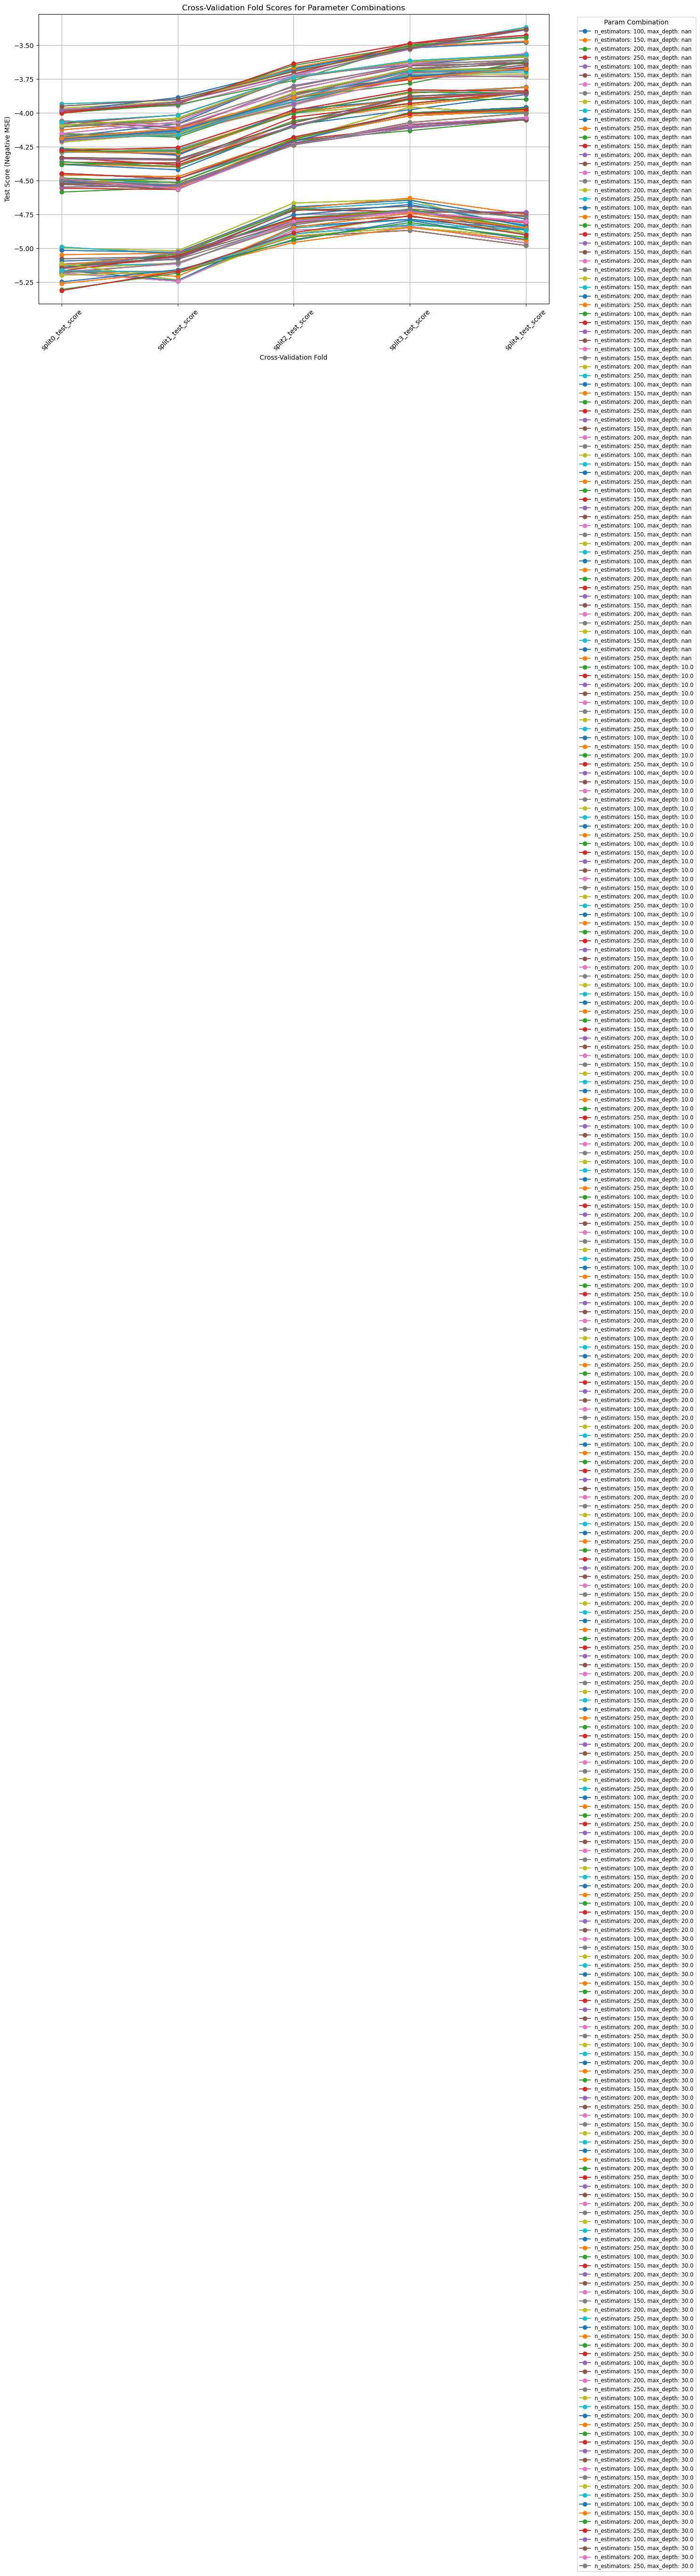

In [538]:
# Extract fold scores and parameter combinations
fold_columns = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
results['param_combination'] = results.apply(
    lambda row: f"n_estimators: {row['param_n_estimators']}, max_depth: {row['param_max_depth']}", axis=1
)

# Plot fold results for each parameter combination
plt.figure(figsize=(14, 8))
for idx, row in results.iterrows():
    plt.plot(fold_columns, row[fold_columns], marker='o', label=row['param_combination'])

plt.title('Cross-Validation Fold Scores for Parameter Combinations')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Test Score (Negative MSE)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Param Combination', fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()


In [539]:
# Filter and sort by the scoring metric
results = results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                   'param_min_samples_leaf', 'param_max_features', 'mean_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')

# Display the top results
print(results.head())

     param_n_estimators  param_max_depth  param_min_samples_split  \
39                  250              NaN                        2   
3                   250              NaN                        2   
255                 250             30.0                        2   
219                 250             30.0                        2   
1                   150              NaN                        2   

     param_min_samples_leaf param_max_features  mean_test_score  \
39                        1               log2        -3.681486   
3                         1               sqrt        -3.681486   
255                       1               log2        -3.690382   
219                       1               sqrt        -3.690382   
1                         1               sqrt        -3.693946   

     rank_test_score  
39                 1  
3                  1  
255                3  
219                3  
1                  5  


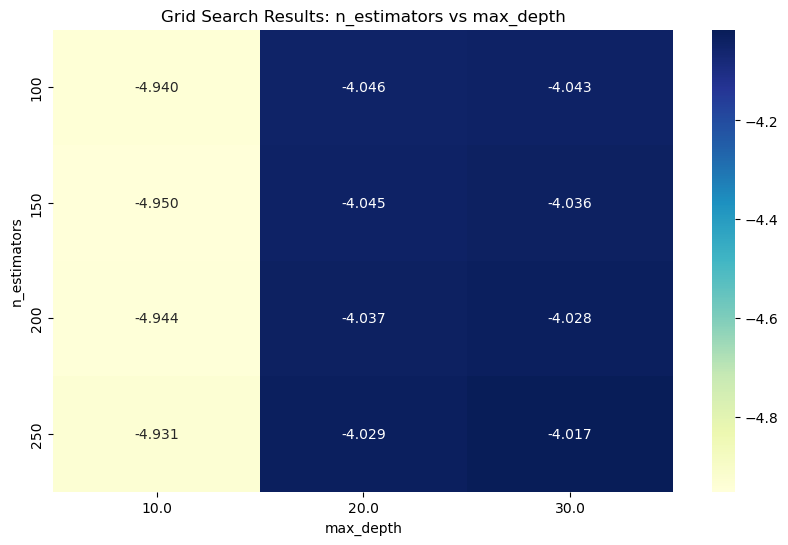

In [540]:
# Group by parameters and calculate the mean of mean_test_score
aggregated_results = results.groupby(['param_n_estimators', 'param_max_depth'])['mean_test_score'].mean().reset_index()
aggregated_results.drop_duplicates( subset=['param_n_estimators', 'param_max_depth', 'mean_test_score'] )

# Create a pivot table
pivot_table = aggregated_results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title('Grid Search Results: n_estimators vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.show()

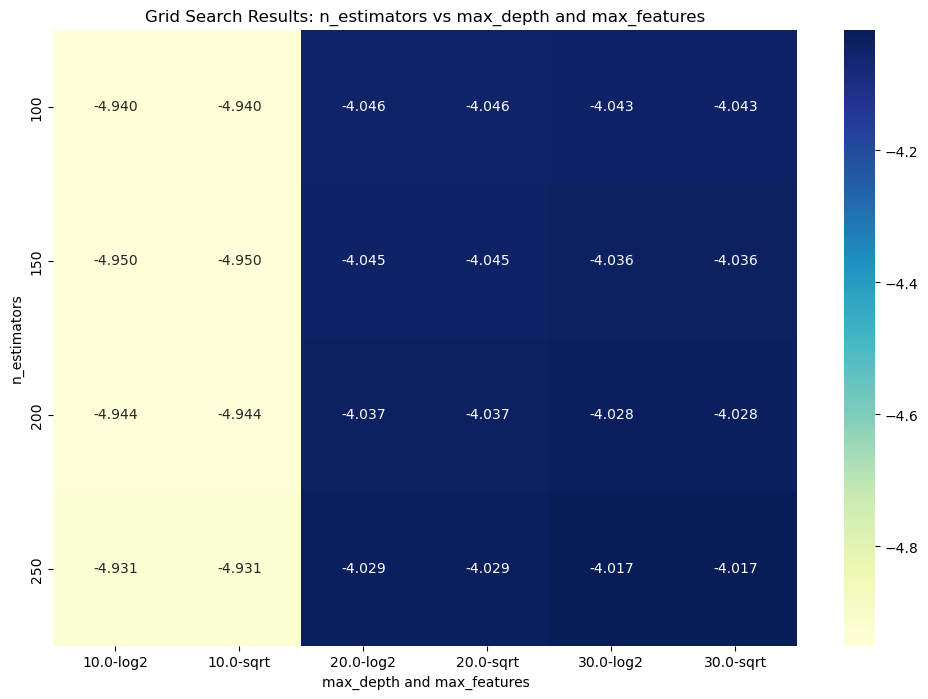

In [541]:
# Group by parameters and calculate the mean of mean_test_score
aggregated_results = results.groupby(
    ['param_n_estimators', 'param_max_depth', 'param_max_features']
)['mean_test_score'].mean().reset_index()

# Drop duplicates if necessary
aggregated_results.drop_duplicates(
    subset=['param_n_estimators', 'param_max_depth', 'param_max_features', 'mean_test_score'],
    inplace=True
)

# Create a pivot table for heatmap
pivot_table = aggregated_results.pivot_table(
    index='param_n_estimators', 
    columns=['param_max_depth', 'param_max_features'], 
    values='mean_test_score'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title('Grid Search Results: n_estimators vs max_depth and max_features')
plt.xlabel('max_depth and max_features')
plt.ylabel('n_estimators')
plt.show()


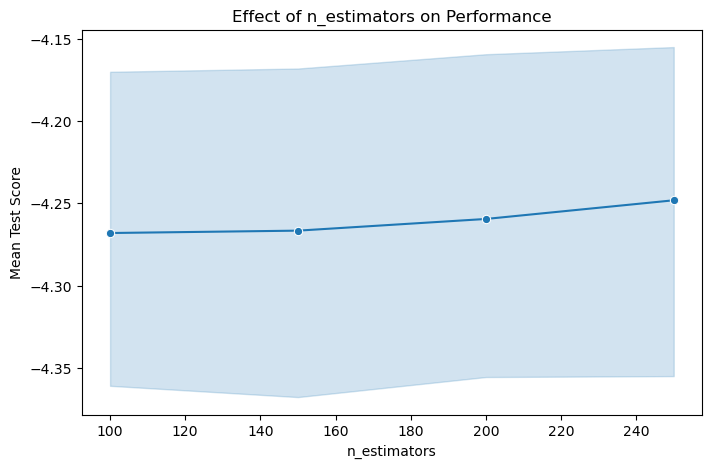

In [542]:
# Plot trends for n_estimators
plt.figure(figsize=(8, 5))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title('Effect of n_estimators on Performance')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

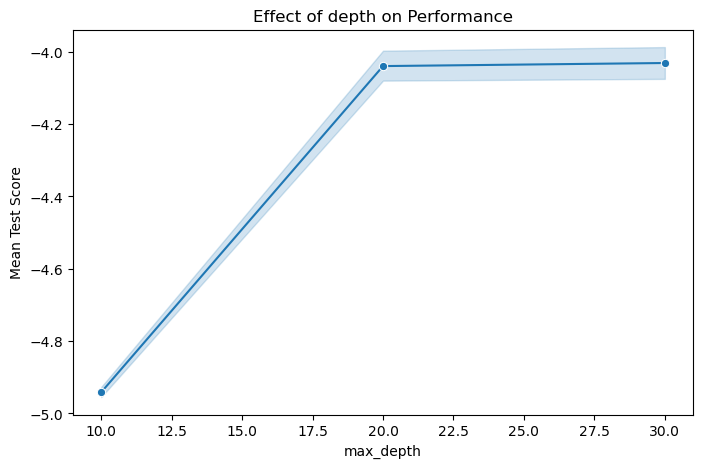

In [543]:
# Plot trends for n_estimators
plt.figure(figsize=(8, 5))
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', marker='o')
plt.title('Effect of depth on Performance')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.show()

In [544]:
from sklearn.ensemble import RandomForestRegressor
# Correct way to initialize the RandomForestRegressor with the best parameters
rf_model_75 = RandomForestRegressor(**grid_search3.best_params_, random_state=9922)
rf_model_75.fit(x_train_75, y_train_75)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=9922)

In [545]:
from sklearn.ensemble import RandomForestRegressor
rf_model_70_pt = RandomForestRegressor(**grid_search3.best_params_, random_state=9922)
rf_model_70_pt.fit(x_train_70, y_train_70)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=9922)

In [546]:
from sklearn.ensemble import RandomForestRegressor
rf_model_80_pt = RandomForestRegressor(**grid_search3.best_params_, random_state=9922)
rf_model_80_pt.fit(x_train_80, y_train_80)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=9922)

In [547]:
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
rf_model_80_pt = RandomForestRegressor(random_state=9922)
rf_model_80_pt.fit(x_train_80, y_train_80)
dump(rf_model_80_pt,'rf_model3.joblib')

['rf_model3.joblib']

In [548]:
from sklearn.ensemble import RandomForestRegressor
rf_model_60_pt = RandomForestRegressor(**grid_search3.best_params_, random_state=9922)
rf_model_60_pt.fit(x_train_60, y_train_60)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=9922)

In [549]:
import joblib
joblib.dump(rf_model, 'rf_model2.joblib')

['rf_model2.joblib']

In [550]:
# Define the function to calculate metrics
def rf_print_metrics(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1) / (y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      =', sklm.mean_squared_error(y_true, y_predicted))
    print('Root Mean Square Error =', math.sqrt(sklm.mean_squared_error(y_true, y_predicted)))
    print('Mean Absolute Error    =', sklm.mean_absolute_error(y_true, y_predicted))
    print('Median Absolute Error  =', sklm.median_absolute_error(y_true, y_predicted))
    print('R^2                    =', r2)
    print('Adjusted R^2           =', r2_adj)
    
    return sklm.mean_squared_error(y_true, y_predicted), r2

# Initialize and fit the model on each training set using the best parameters from grid search
for x_train, y_train, x_test, y_test, dataset_name in [
    (x_train_75, y_train_75, x_test_25, y_test_25, '75-25 Split'),
    (x_train_70, y_train_70, x_test_30, y_test_30, '70-30 Split'),
    (x_train_80, y_train_80, x_test_20, y_test_20, '80-20 Split'),
    (x_train_60, y_train_60, x_test_40, y_test_40, '60-40 Split')
]:
    rf_model_tuned = RandomForestRegressor(**grid_search3.best_params_, random_state=9922)
    rf_model_tuned.fit(x_train, y_train)
    y_pred = rf_model_tuned.predict(x_test)
    
    print(f"\nMetrics for {dataset_name}:")
    rf_print_metrics(y_test, y_pred, n_parameters=len(grid_search3.best_params_))


Metrics for 75-25 Split:
Mean Square Error      = 3.666952491356186
Root Mean Square Error = 1.9149288475962198
Mean Absolute Error    = 0.9639288671771206
Median Absolute Error  = 0.1891899999999831
R^2                    = 0.8449266948152142
Adjusted R^2           = 0.8447442556326439

Metrics for 70-30 Split:
Mean Square Error      = 3.60653053551299
Root Mean Square Error = 1.8990867635558388
Mean Absolute Error    = 0.9632538509836143
Median Absolute Error  = 0.2040149999999996
R^2                    = 0.8465107303996261
Adjusted R^2           = 0.8463602875967833

Metrics for 80-20 Split:
Mean Square Error      = 3.3876265841151527
Root Mean Square Error = 1.8405506198187414
Mean Absolute Error    = 0.9188721999772744
Median Absolute Error  = 0.17619
R^2                    = 0.8541115324125379
Adjusted R^2           = 0.8538969116437443

Metrics for 60-40 Split:
Mean Square Error      = 3.8429998401904766
Root Mean Square Error = 1.9603570695642354
Mean Absolute Error    = 0.988

In [551]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=9922)
rf_model.fit(x_train_75, y_train_75)

RandomForestRegressor(random_state=9922)

In [552]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=9922)
rf_model.fit(x_train_70, y_train_70)

RandomForestRegressor(random_state=9922)

In [553]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=9922)
rf_model.fit(x_train_80, y_train_80)

RandomForestRegressor(random_state=9922)

In [554]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=9922)
rf_model.fit(x_train_60, y_train_60)

RandomForestRegressor(random_state=9922)

In [555]:
def rf_75_pt_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
rf_y_score_25 = rf_model.predict(x_test_25) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = rf_75_pt_print_metrics(y_test_25, rf_y_score_25, 19)    

Mean Square Error      = 3.729050341236555
Root Mean Square Error = 1.9310749185975553
Mean Absolute Error    = 0.869664614537445
Median Absolute Error  = 0.0002
R^2                    = 0.8423006125715754
Adjusted R^2           = 0.8414622815102312


In [556]:
def rf_70_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
rf_y_score_30 = rf_model.predict(x_test_30) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = rf_70_print_metrics(y_test_30, rf_y_score_30, 19)    

Mean Square Error      = 3.6123423464829303
Root Mean Square Error = 1.9006163070127884
Mean Absolute Error    = 0.8606046816364823
Median Absolute Error  = 0.0003625000000000001
R^2                    = 0.8462633872502898
Adjusted R^2           = 0.8455829694903944


In [557]:
def rf_80_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
rf_y_score_20 = rf_model.predict(x_test_20) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = rf_80_print_metrics(y_test_20, rf_y_score_20, 19)    

Mean Square Error      = 3.5403866379499935
Root Mean Square Error = 1.881591517293271
Mean Absolute Error    = 0.849586485866373
Median Absolute Error  = 0.0002
R^2                    = 0.8475329058699775
Adjusted R^2           = 0.8465183374062657


In [558]:
def rf_60_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
rf_y_score_40 = rf_model.predict(x_test_40) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = rf_60_print_metrics(y_test_40, rf_y_score_40, 19)    

Mean Square Error      = 3.71211417723006
Root Mean Square Error = 1.92668476332535
Mean Absolute Error    = 0.863888104197259
Median Absolute Error  = 0.00031250000000000006
R^2                    = 0.8418029667295988
Adjusted R^2           = 0.8412784600803324


# Copare Before and After Tuning 

In [560]:
def rf_bf_80_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2

# Predict on the test data
rf_y_score_20 = rf_model.predict(x_test_20)

# Evaluate and print metrics
(rmse, r2) = rf_bf_80_print_metrics(y_test_20, rf_y_score_20, 19)   

Mean Square Error      = 3.5403866379499935
Root Mean Square Error = 1.881591517293271
Mean Absolute Error    = 0.849586485866373
Median Absolute Error  = 0.0002
R^2                    = 0.8475329058699775
Adjusted R^2           = 0.8465183374062657


In [561]:
# Print the default parameters
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 9922, 'verbose': 0, 'warm_start': False}


In [562]:
import math
import sklearn as sklm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


def rf_af_80_print_metrics(y_true, y_predicted, n_parameters):
    # First compute R^2 and the adjusted R^2
    r2 = r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1) / (y_true.shape[0] - n_parameters) * (1 - r2)
    # Calculate the usual metrics
    mse = mean_squared_error(y_true, y_predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_predicted)
    medae = median_absolute_error(y_true, y_predicted)
    # Print the metrics and the R^2 values
    print(f'Mean Square Error      = {mse}')
    print(f'Root Mean Square Error = {rmse}')
    print(f'Mean Absolute Error    = {mae}')
    print(f'Median Absolute Error  = {medae}')
    print(f'R^2                    = {r2}')
    print(f'Adjusted R^2           = {r2_adj}')
    return mse, rmse, mae, medae, r2, r2_adj


# Initialize the RandomForestRegressor with random_state
rf_model_tune = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=9922)
rf_model_tune.fit(x_train_80, y_train_80)

# Predict on the test data
rf_y_score_20 = rf_model_tune.predict(x_test_20)

# Evaluate and print metrics
mse, rmse, mae, medae, r2, r2_adj = rf_af_80_print_metrics(y_test_20, rf_y_score_20, 19)

Mean Square Error      = 3.2022891488792635
Root Mean Square Error = 1.7894941041756085
Mean Absolute Error    = 0.8098287596088833
Median Absolute Error  = 0.0
R^2                    = 0.8620931070465134
Adjusted R^2           = 0.8611754271673405


In [563]:
# Print the tune parameters
print(rf_model_tune.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 9922, 'verbose': 0, 'warm_start': False}


In [564]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming next_day_features is a DataFrame with similar structure as df_weather_actual3
# Prepare the new data for prediction (replace with actual next day's data values)
next_day_data = {
    'icon': 'clear-day',
    'Month': 12,
    'Hour1': 13,
    'cloud_cover': 0.22,
    'apparent_temperature': 29.876667,
    'temperature': 26,
    'humidity': 8.9,
    'wind_bearing': 239.458333,
    'wind_speed': 2.52,
    'wind_gust': 3.74,
    'pressure': 1008.83625,
    'uv_index': 0.0,
    'ozone': 275.6,
    'precip_probability': 0.0,
    'visibility': 3.761667
}

# Convert to DataFrame
next_day_df = pd.DataFrame([next_day_data])

# Encode the 'icon' feature
next_day_icon_encoded = enc.transform([next_day_df['icon']])  # Label encoding
next_day_icon_ohe = ohe.transform(next_day_icon_encoded.reshape(-1, 1)).toarray()  # One-hot encoding

# Extract numerical features and ensure they match the structure of the training set
numerical_features = np.array(next_day_df[[
    "Month", "Hour1", "cloud_cover", "apparent_temperature", "temperature", 
    "humidity", "wind_bearing", "wind_speed", "wind_gust", "pressure", 
    "uv_index", "ozone", 'precip_probability', "visibility"
]])

# Concatenate encoded and numerical features to form the full feature set
next_day_features_processed = np.concatenate([next_day_icon_ohe, numerical_features], axis=1)

# Select only the first 12 columns if the scaler was fitted with 12 features
next_day_features_to_scale = next_day_features_processed[:, :12]

# Scale the selected subset of features
next_day_features_scaled = scaler.transform(next_day_features_to_scale)

# Print the results
print("Processed next_day_features shape after scaling:", next_day_features_scaled.shape)


Processed next_day_features shape after scaling: (1, 12)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [565]:
next_day_power_prediction = rf_model.predict(next_day_features_processed)

In [566]:
print(next_day_power_prediction)

[5.7797]


In [567]:
next_day_features_processed

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.20000000e+01, 1.30000000e+01, 2.20000000e-01, 2.98766670e+01,
        2.60000000e+01, 8.90000000e+00, 2.39458333e+02, 2.52000000e+00,
        3.74000000e+00, 1.00883625e+03, 0.00000000e+00, 2.75600000e+02,
        0.00000000e+00, 3.76166700e+00]])

**#Decision TreeRegressor**

In [569]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_75, y_train_75)

DecisionTreeRegressor(random_state=42)

In [570]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_70, y_train_70)

DecisionTreeRegressor(random_state=42)

In [571]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_80, y_train_80)

DecisionTreeRegressor(random_state=42)

In [572]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_60, y_train_60)

DecisionTreeRegressor(random_state=42)

In [573]:
def dt_75_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
dt_y_score_25 = dt_model.predict(x_test_25) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = dt_75_print_metrics(y_test_25, dt_y_score_25, 19)    

AttributeError: module 'sklearn' has no attribute 'r2_score'

In [ ]:
def dt_70_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
dt_y_score_30 = dt_model.predict(x_test_30) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = dt_70_print_metrics(y_test_30, dt_y_score_30, 19)    

In [ ]:
def dt_80_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
dt_y_score_20 = dt_model.predict(x_test_20) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = dt_80_print_metrics(y_test_20, dt_y_score_20, 19)    

In [ ]:
def dt_60_print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
dt_y_score_40 = dt_model.predict(x_test_40) 
#y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = dt_60_print_metrics(y_test_40, dt_y_score_40, 19)    

# Cross Validation

In [ ]:
# Initialize the Random Forest Regressor model
rf_model2 = RandomForestRegressor()

# Perform 5-fold cross-validation with negative mean squared error as the scoring metric
cv_scores = cross_val_score(rf_model2, x_train_80, y_train_80, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive values
mse_scores = -cv_scores

# Print the results
print("Cross-validation MSE scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("Standard deviation of MSE:", mse_scores.std())
print("Mean RMSE:", np.sqrt(mse_scores.mean()))